#COVID-19 pandemic
##Some general Information about Covid-19
The **COVID-19 pandemic**, also known as the **coronavirus pandemic**, is an ongoing pandemic of coronavirus disease 2019 (commonly known as COVID-19 [[1]](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/technical-guidance/naming-the-coronavirus-disease-(covid-2019)-and-the-virus-that-causes-it)) caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). This disease was first identified in December 2019 in Wuhan, China when the WHO China Country Office was informed of a pneumonia of unknown cause [[2a]](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen). The outbreak started in Wuhan in January 2020 with the Chinese authorities reporting the first case in 4-1-2020 [[2b]](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/events-as-they-happen).Later in March 2020, having spread in all around the globe, the World Health Organization (WHO) declared Covid-19 disease as a pandemic [[3]](https://www.who.int/dg/speeches/detail/who-director-general-s-opening-remarks-at-the-media-briefing-on-covid-19---11-march-2020).The first reported death by Covid-19 was in 11-1-2020 also in Wuhan [[4]](https://www.nytimes.com/2020/01/10/world/asia/china-virus-wuhan-death.html).By the end 2020, more than 75 million cases have been confirmed (that's approximately the 1% of the world popoulation), with more than 1.5 million deaths attributed to COVID-19.

During first half of 2020 the whole world was faced with unprecedented situations when the most countries were led to total (or soft) lockdown in order to protect citizens and their health systems.Unfortunately, many health systems collapsed including Italy, Spain and some of US states[[5a]](https://newseu.cgtn.com/news/2020-03-20/How-COVID-19-is-pushing-the-Italian-healthcare-system-towards-collapse-OZQQf0fgT6/index.html),[[5b]](https://www.dailysabah.com/world/europe/spanish-health-system-on-brink-of-collapse-due-to-covid-19-pandemic),[[5c]](https://www.ft.com/content/3bbb4f7c-890e-11ea-a01c-a28a3e3fbd33) under the tremendous pressure from countless of patients in need of hospitalization and intensive care units resulting thousands of deaths.From the summer of 2020 onwards, when the second wave of the virus began to spread, governments are slowly tryied to avoid lockdowns due to the huge impact on their economy.Nevertheless, οther measures were still implemented in order to prevent over-transmission of the virus like travel restrictions, quarantines, event postponements and cancellations, social distancing and avoid crowding.However, these meassures could not hold the number of cases in a satisfactory level for long.Around the November of 2020, a large part of Europe for once more put a 
padlock in order to stop (or mitigate) the coronavirus dispersal.



As for the disease itself the most common symptoms include fever, cough, fatigue,  breathing difficulties, and loss of smell.In more severe situations of the disease complications may include pneumonia and acute respiratory infection. The incubation period is typically around five days but may range from one to 14 days [[6]](https://www.ecdc.europa.eu/en/covid-19/facts/questions-answers-basic-facts).To date, there are no approved vaccines against Covid-19 disease (i.e. to have been approved and accepted universally [[7]](https://www.bbc.com/news/world-53864069)).Ηowever, there are several attempts being made, internationally to find a suitable vaccine.
Furthmore, no suitable treatment has yet been found for Covid-19 disease, and as a result other antiviral therapies are being used. As in the case of the vaccine, several attempts to find a cure are made worldwide [[8]](https://www.health.harvard.edu/diseases-and-conditions/treatments-for-covid-19).



##Visualization Section
In this project, our purpose is to visualize some of the COVID-19 disease data that we received from WHO[[9]](https://covid19.who.int/table).These data are related to total cases and deaths worldwide as well as total cases and deaths at country level. We also calculate the case fatality rate (CFR) both globally and internationally.In this point we need to distinguish the case fatality rate from the infection fatality rate (IFR).While the former is calculated as the fraction of confirmed deaths to confirmed cases, the latter is the ratio of confirmed deaths to the actual number of people infected with the virus. Therefore, in reality, we don't have the exact percentage for IFR since we don't know how many total cases are in the global population.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import folium
import io
from operator import itemgetter, attrgetter
import json
import os
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from google.colab import drive ,files
import sys
from difflib import SequenceMatcher
from fbprophet import Prophet

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
os.chdir("/content/gdrive/My Drive")
data = pd.read_csv('WHO-COVID-19-global-data.csv')
data=pd.DataFrame(data)
population =  pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', index_col=None, header=None)
population = pd.DataFrame(population)
population = np.array(population)
more_data = pd.read_csv('owid-covid-data.csv')
more_data = pd.DataFrame(more_data)
sys.path.append('/content/gdrive/My Drive')

In [ ]:
#print((total_data['iso_code']))
new_tests=more_data['new_tests']
total_tests=more_data['total_tests']
hosp_patients=more_data['hosp_patients']
icu_patients=more_data['icu_patients']
all_countries=more_data['location'].unique()
#country_codes=total_data[' Country_code'].unique()
Dates=more_data['date'].unique()
Dates=sorted(list (Dates))
print(len(Dates))
print(len(all_countries))

305
215


In [ ]:
icu_patients=[]
new_tests=[]
cumulative_tests=[]
hosp_patients=[]
for i in all_countries:
  icu_patients.append(list(more_data['icu_patients'].where(more_data['location']==i).dropna()))
  hosp_patients.append(list(more_data['hosp_patients'].where(more_data['location']==i).dropna()))
  cumulative_tests.append(list(more_data['total_tests'].where(more_data['location']==i).dropna()))
  new_tests.append(list(more_data['new_tests'].where(more_data['location']==i).dropna()))


In [ ]:
countries=data[' Country'].unique()
country_codes=data[' Country_code'].unique()
who_region=data[' WHO_region'].unique()
Dates_reported=data['Date_reported'].unique()
Dates_reported =sorted(list (Dates_reported))
print(len(Dates_reported))

306


In [ ]:
New_cases=[]
New_deaths=[]
Cumulative_cases=[]
Cumulative_deaths=[]
for c in countries:
    New_cases.append(list(data[' New_cases'].where(data[' Country']==c).dropna()))
    New_deaths.append(list(data[' New_deaths'].where(data[' Country']==c).dropna()))
    Cumulative_cases.append(list(data[' Cumulative_cases'].where(data[' Country']==c).dropna()))
    Cumulative_deaths.append(list(data[' Cumulative_deaths'].where(data[' Country']==c).dropna()))

print(len(New_cases[0]))

306


In [ ]:
#ftiaxnw mia lista apo listes me opou kathe upolista exei onoma ths xwras kai ton pluthismo ths. 
def World_Population(pop):
  tlist = []
  for i in range(43,len(pop)):
    for j in range(0,len(countries)):
      if (pop[i,2]==countries[j]):
        mlk =[pop[i,2],pop[i,-1]*1000]
        tlist.append(mlk)
  return (tlist)

Population = World_Population(population)
print(Population)

[['Burundi', 11890781.0], ['Comoros', 869595.0], ['Djibouti', 988002.0], ['Eritrea', 3546427.0], ['Ethiopia', 114963583.0], ['Kenya', 53771300.0], ['Madagascar', 27691019.0], ['Malawi', 19129955.0], ['Mauritius', 1271767.0], ['Mayotte', 272813.0], ['Mozambique', 31255435.0], ['Réunion', 895308.0], ['Rwanda', 12952209.0], ['Seychelles', 98340.0], ['Somalia', 15893219.0], ['South Sudan', 11193729.0], ['Uganda', 45741000], ['United Republic of Tanzania', 59734213.0], ['Zambia', 18383956.0], ['Zimbabwe', 14862927.0], ['Angola', 32866267.999999996], ['Cameroon', 26545864.0], ['Central African Republic', 4829764.0], ['Chad', 16425859.0], ['Congo', 5518092.0], ['Democratic Republic of the Congo', 89561404.0], ['Equatorial Guinea', 1402985.0], ['Gabon', 2225728.0], ['Sao Tome and Principe', 219161.0], ['Botswana', 2351625.0], ['Eswatini', 1160164.0], ['Lesotho', 2142252.0], ['Namibia', 2540916.0], ['South Africa', 59308690.0], ['Benin', 12123198.0], ['Burkina Faso', 20903278.0], ['Cabo Verde',

In [ ]:
#h Overall_per_country einai lista apo listes.Kathe lista exei (pros to paron) 6 stoixeia (isws mpoun kai alla px recoveries, test klp)
#ayta einai cases,deaths,name ths xwras,mortality rate, cases/1m , deaths/1m and a list of the mortality rate in the specific country throughout time
#it also contains lists with the hospitalized patients, patients in ICU, new test per day and cumulative tests throughout time and total tests up to now
def Make_Mrcountries(k):
  MRlist = []
  for i in range(len(Cumulative_cases[k])):
    if (Cumulative_cases[k][i]!=0):
      MRlist.append((100*Cumulative_deaths[k][i])/Cumulative_cases[k][i])
    else:
      MRlist.append(0)
  return (MRlist)

def Make_Overall(alist):
  countries[135] = "Micronesia"
  for i in range(len(countries)):
      templist = []
      My_array = ["empty",0,0,0,0,0,[],[],[],[],[],0]
      My_array[0] = countries[i]
      My_array[1] = Cumulative_cases[i][-1]
      My_array[2] = Cumulative_deaths[i][-1]
      if (Cumulative_cases[i][-1]!=0):
        My_array[3] = (Cumulative_deaths[i][-1]/Cumulative_cases[i][-1])*100
      else:
        My_array[3] = 0.0
      for j in Population:
        if (j[0]==countries[i]):
          My_array[4] = ((Cumulative_cases[i][-1])/j[1])*1000000
          My_array[5] = ((Cumulative_deaths[i][-1])/j[1])*1000000
          break
        else:
          My_array[4] = 0.0
          My_array[5] = 0.0
      My_array[6] = Make_Mrcountries(i)
      for j in range(len(all_countries)):
        x = similar(all_countries[j],countries[i])
        templist.append(x)
      if (countries[i]=="Czechia"):
        j=49
      elif (countries[i]=="Russian Federation"):
        j=163
      else:
        j = templist.index(max(templist))
      My_array[7] = hosp_patients[j]
      My_array[8] = icu_patients[j]
      My_array[9] = new_tests[j]
      My_array[10] = cumulative_tests[j]
      if (My_array[10]!=[]):
        My_array[11] = My_array[10][-1]
      else:
        My_array[11] = 0
      #for j in range(len(all_countries)):
      #  x = similar(all_countries[j],countries[i])
      #  if ((x>=0.7) or (all_countries[j]==countries[i])):
      #   My_array[7] = hosp_patients[j]
      #    My_array[8] = icu_patients[j]
      #    My_array[9] = new_tests[j]
      #    My_array[10] = cumulative_tests[j]
      #    if (My_array[10]!=[]):
      #      My_array[11] = My_array[10][-1]
      #    else:
      #     My_array[11] = 0
      alist.append(My_array)
  return (alist)

Overall_per_country = []
Overll_per_country = Make_Overall(Overall_per_country)

In [ ]:
for i in range(len(countries)):
  templist=[]
  for j in range(len(all_countries)):
    x = similar(all_countries[j],countries[i])
    templist.append(x)
  j = templist.index(max(templist))
  print(countries[i], "is similar to", all_countries[j])

Afghanistan is similar to Afghanistan
Albania is similar to Albania
Algeria is similar to Algeria
American Samoa is similar to Azerbaijan
Andorra is similar to Andorra
Angola is similar to Angola
Anguilla is similar to Anguilla
Antigua and Barbuda is similar to Antigua and Barbuda
Argentina is similar to Argentina
Armenia is similar to Armenia
Aruba is similar to Aruba
Australia is similar to Australia
Austria is similar to Austria
Azerbaijan is similar to Azerbaijan
Bahamas is similar to Bahamas
Bahrain is similar to Bahrain
Bangladesh is similar to Bangladesh
Barbados is similar to Barbados
Belarus is similar to Belarus
Belgium is similar to Belgium
Belize is similar to Belize
Benin is similar to Benin
Bermuda is similar to Bermuda
Bhutan is similar to Bhutan
Bolivia (Plurinational State of) is similar to Burkina Faso
Bonaire, Sint Eustatius and Saba is similar to Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina is similar to Bosnia and Herzegovina
Botswana is similar to Botswa

In [ ]:
for i in range(len(all_countries)):
  print(all_countries[i],i)
  if (cumulative_tests[i]!=[]):
    print((hosp_patients[i]))
    print((icu_patients[i]))
    print("")


Aruba 0
Afghanistan 1
Angola 2
Anguilla 3
Albania 4
Andorra 5
United Arab Emirates 6
[]
[]

Argentina 7
Armenia 8
Antigua and Barbuda 9
Australia 10
[]
[]

Austria 11
[1057.0, 1096.0, 1001.0, 967.0, 909.0, 817.0, 756.0, 700.0, 677.0, 651.0, 579.0, 561.0, 517.0, 500.0, 428.0, 422.0, 420.0, 418.0, 418.0, 360.0, 339.0, 309.0, 291.0, 279.0, 264.0, 243.0, 234.0, 212.0, 208.0, 197.0, 196.0, 174.0, 188.0, 159.0, 144.0, 137.0, 139.0, 127.0, 116.0, 107.0, 103.0, 98.0, 97.0, 97.0, 88.0, 87.0, 87.0, 75.0, 72.0, 69.0, 82.0, 84.0, 80.0, 81.0, 69.0, 72.0, 69.0, 79.0, 78.0, 71.0, 68.0, 70.0, 71.0, 70.0, 71.0, 71.0, 74.0, 64.0, 74.0, 69.0, 72.0, 68.0, 72.0, 78.0, 91.0, 77.0, 78.0, 80.0, 77.0, 83.0, 82.0, 83.0, 96.0, 94.0, 99.0, 98.0, 99.0, 112.0, 111.0, 102.0, 103.0, 101.0, 97.0, 95.0, 89.0, 94.0, 105.0, 100.0, 89.0, 93.0, 113.0, 107.0, 115.0, 117.0, 118.0, 120.0, 121.0, 116.0, 119.0, 118.0, 114.0, 110.0, 104.0, 84.0, 114.0, 116.0, 121.0, 116.0, 112.0, 116.0, 116.0, 135.0, 137.0, 141.0, 145.0, 146.0, 

In [ ]:
L=len(Dates_reported)
def padding_function(cases,deaths,cum_cases,cum_deaths,newtests,cumtests,hospat,icupat,L):
  for i,c in enumerate(countries):
    P=L-len(cases[i])
    for k in range(P):
      cases[i].insert(0,0)
      deaths[i].insert(0,0)
      cum_cases[i].insert(0,0)
      cum_deaths[i].insert(0,0)
  for i,c in enumerate(all_countries):
    P1=L-len(newtests[i])
    P2=L-len(cumtests[i])
    P3=L-len(hosp_patients[i])
    for k in range(P1):
      newtests[i].insert(0,0)
    for k in range(P2):
      cumtests[i].insert(0,0)
    for k in range(P3):
      hospat[i].insert(0,0)
      icupat[i].insert(0,0)
  return cases,deaths,cum_cases,cum_deaths,newtests,cumtests,hospat,icupat

New_cases,New_deaths,Cumulative_cases,Cumulative_deaths,new_tests,cumulative_tests,hosp_patients,icu_patients = padding_function(New_cases,New_deaths,Cumulative_cases,Cumulative_deaths,new_tests,cumulative_tests,hosp_patients,icu_patients,L) 
print(len(icu_patients[97]))

306


In [ ]:
def moving_av(series,w):
    step=w//2
    s=[]
    for i in range(step):
        s.append(0)
    for c in range(step,len(series)-step):
        sum=0
        for i in range(c-step,c+step+1):
            sum=sum+series[i]
        s.append(sum/w)
    for i in range(step):
        s.append(0)
    return s

In [ ]:
def World_data():
    SumCases = 0
    SumDeaths = 0
    SumPop = 0
    for i in Population:
      SumPop = SumPop + i[1]
    for i in Overall_per_country:
      SumCases = SumCases + i[1]
      SumDeaths = SumDeaths + i[2]
    W_c_p_m = int ((SumCases/SumPop)*1000000)
    W_d_p_m = int ((SumDeaths/SumPop)*1000000)
    day_list=[]
    time_list=[]
    clist_total = [sum(x) for x in zip(*Cumulative_cases)]
    dlist_total = [sum(x) for x in zip(*Cumulative_deaths)]
    clist_daily = [sum(x) for x in zip(*New_cases)]
    dlist_daily = [sum(x) for x in zip(*New_deaths)]
    for i,j in zip(clist_daily,dlist_daily):
      if (i!=0): day_list.append(j/i)
      else: day_list.append(0)
    
    for i,j in zip(clist_total,dlist_total):
      if (i!=0): time_list.append(j/i)
      else: time_list.append(0)

    return (clist_total,dlist_total,clist_daily,dlist_daily,day_list,time_list,SumCases,SumDeaths,W_c_p_m,W_d_p_m)


In [ ]:
World_cases ,World_deaths, Daily_World_cases, Daily_World_deaths,M_R_global_per_day,M_R_global_over_time,Total_cases,Total_deaths,Wcases_per_million,Wdeaths_per_million = World_data()
World_cases = [round(x) for x in World_cases]
World_deaths = [round(x) for x in World_deaths]

In [ ]:
def plot_top10(tlist,index,string1,string2,f):
  sorted_list = sorted(tlist, key=itemgetter(index),reverse=True)
  fig = plt.figure(figsize=(16,6))
  ax = fig.add_axes([0,0,1,1])
  plt.title("Top ten countries " +  string1,fontsize=20, color='C0')
  plt.xlabel('Country', fontsize=20)
  plt.ylabel(string2,fontsize=20)
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'yellow', 'magenta', 'green', 'orange', 'pink')
  for i in range(0,10):
    ax.bar(sorted_list[i][0],sorted_list[i][index],color=colors[i], width=0.9, label=sorted_list[i][0])
  plt.legend(fontsize=f)
  plt.show()

def plot_WorldMR(tlist,string):
  plt.figure(figsize=(50,20))
  plt.title("Worldwide {} Mortality rate of Covid-19".format(string),fontsize=50)
  plt.xlabel('Days passed since the begining', fontsize=40)
  plt.ylabel('{} mortality rate'.format(string),fontsize=30)
  plt.plot(Dates_reported, tlist, 'r', marker='o', linewidth=1.9, label='Mortaity Rate')
  plt.xticks(rotation=90)
  plt.yticks(size=20)
  plt.legend(loc='best',fontsize=40)
  plt.grid(True, linewidth=2.0)
  plt.show()

In [ ]:
def plot_daily(cases,deaths,weekly_cases,weekly_deaths,country):
    fig = plt.figure(figsize=(50,20))
    ax = fig.add_axes([0,0,1,1])
    plt.title("Daily cases and deaths {}".format(country),fontsize=50)
    plt.xlabel('Day', fontsize=40)
    plt.ylabel('New Cases/New Deaths',fontsize=40)
    ax.bar(Dates_reported,cases,color='r',width=0.9, label='New Cases')
    ax.bar(Dates_reported,deaths, color= 'm',width=0.9, label='New Deaths')
    plt.plot(Dates_reported,weekly_cases,color='b',linewidth=6,label='weekly average cases')
    plt.plot(Dates_reported,weekly_deaths,color='g',linewidth=6,label='weekly average deaths')
    plt.yticks(size=20)
    plt.xticks(rotation=90)
    plt.legend(fontsize=40)
    plt.grid(True)
    plt.show()

def plot_cumulative(cases,deaths,country,scale,number):
    plt.figure(figsize=(50,20))
    plt.title("Cumulative cases and deaths {} ({} scale)".format(country,scale),fontsize=50)
    plt.xlabel('Days passed since the begining', fontsize=40)
    plt.ylabel('Cumulative Cases/Deaths ('+ scale + ' scale)',fontsize=30)
    plt.plot(Dates_reported, cases, 'r', marker='o', linewidth=1.9, label='Cases')
    plt.plot(Dates_reported, deaths, 'm', marker='*', linewidth=1.9, label='Deaths')
    plt.yscale(scale)
    plt.xticks(rotation=90)
    if ((scale=="linear") and (number!=0)):
      d = (cases[-1]-cases[0])/10
      plt.yticks(np.arange(cases[0], cases[-1], d))
    plt.legend(loc='best',fontsize=40)
    plt.grid(True, linewidth=2.0)
    plt.show()

In [ ]:
def plot_daily_tests(tests,weekly_tests,country):
    fig = plt.figure(figsize=(50,20))
    ax = fig.add_axes([0,0,1,1])
    plt.title("Daily tests {}".format(country),fontsize=50,color='C0')
    plt.xlabel('Day', fontsize=40)
    plt.ylabel('New Tests',fontsize=40)
    ax.bar(Dates_reported,tests,color='g',width=0.9, label='New Tests')
    plt.plot(Dates_reported,weekly_tests,color='b',linewidth=6,label='weekly average tests')
    plt.yticks(size=20)
    plt.xticks(rotation=90)
    plt.legend(fontsize=40)
    plt.grid(True)
    plt.show()

def plot_cum_tests(tests,country,scale,number):
    plt.figure(figsize=(50,20))
    plt.title("Cumulative tests {} ({} scale)".format(country,scale),fontsize=50,color='C0')
    plt.xlabel('Days passed since the begining', fontsize=40)
    plt.ylabel('Cumulative Tests ('+ scale + ' scale)',fontsize=30)
    plt.plot(Dates_reported, tests, 'g', marker='*', linewidth=1.9, label='Tests')
    plt.yscale(scale)
    plt.xticks(rotation=90)
    if ((scale=="linear") and (number!=0)):
      d = (tests[-1]-tests[0])/10
      plt.yticks(np.arange(tests[0], tests[-1], d),size=10)
    plt.legend(loc='best',fontsize=40)
    plt.grid(True, linewidth=2.0)
    plt.show()

def plot_patients(hosp_p,icu_p,country,scale,number):
    plt.figure(figsize=(50,20))
    plt.title("Hospitilized patients and ICU patients {} ({} scale)".format(country,scale),fontsize=50,color='C0')
    plt.xlabel('Days passed since the begining', fontsize=40)
    plt.ylabel('Number of patients ('+ scale + ' scale)',fontsize=30)
    plt.plot(Dates_reported, hosp_p, 'c', marker='o', linewidth=1.9, label='Hospitilized Patients')
    plt.plot(Dates_reported, icu_p, 'r', marker='*', linewidth=1.9, label='ICU Patients')
    plt.yscale(scale)
    plt.xticks(rotation=90)
    if ((scale=="linear") and (number!=0)):
      d = (hosp_p[-1]-hosp_p[0])/10
      plt.yticks(np.arange(hosp_p[0],hosp_p[-1], d),size=10)
    plt.legend(loc='best',fontsize=40)
    plt.grid(True, linewidth=2.0)
    plt.show()

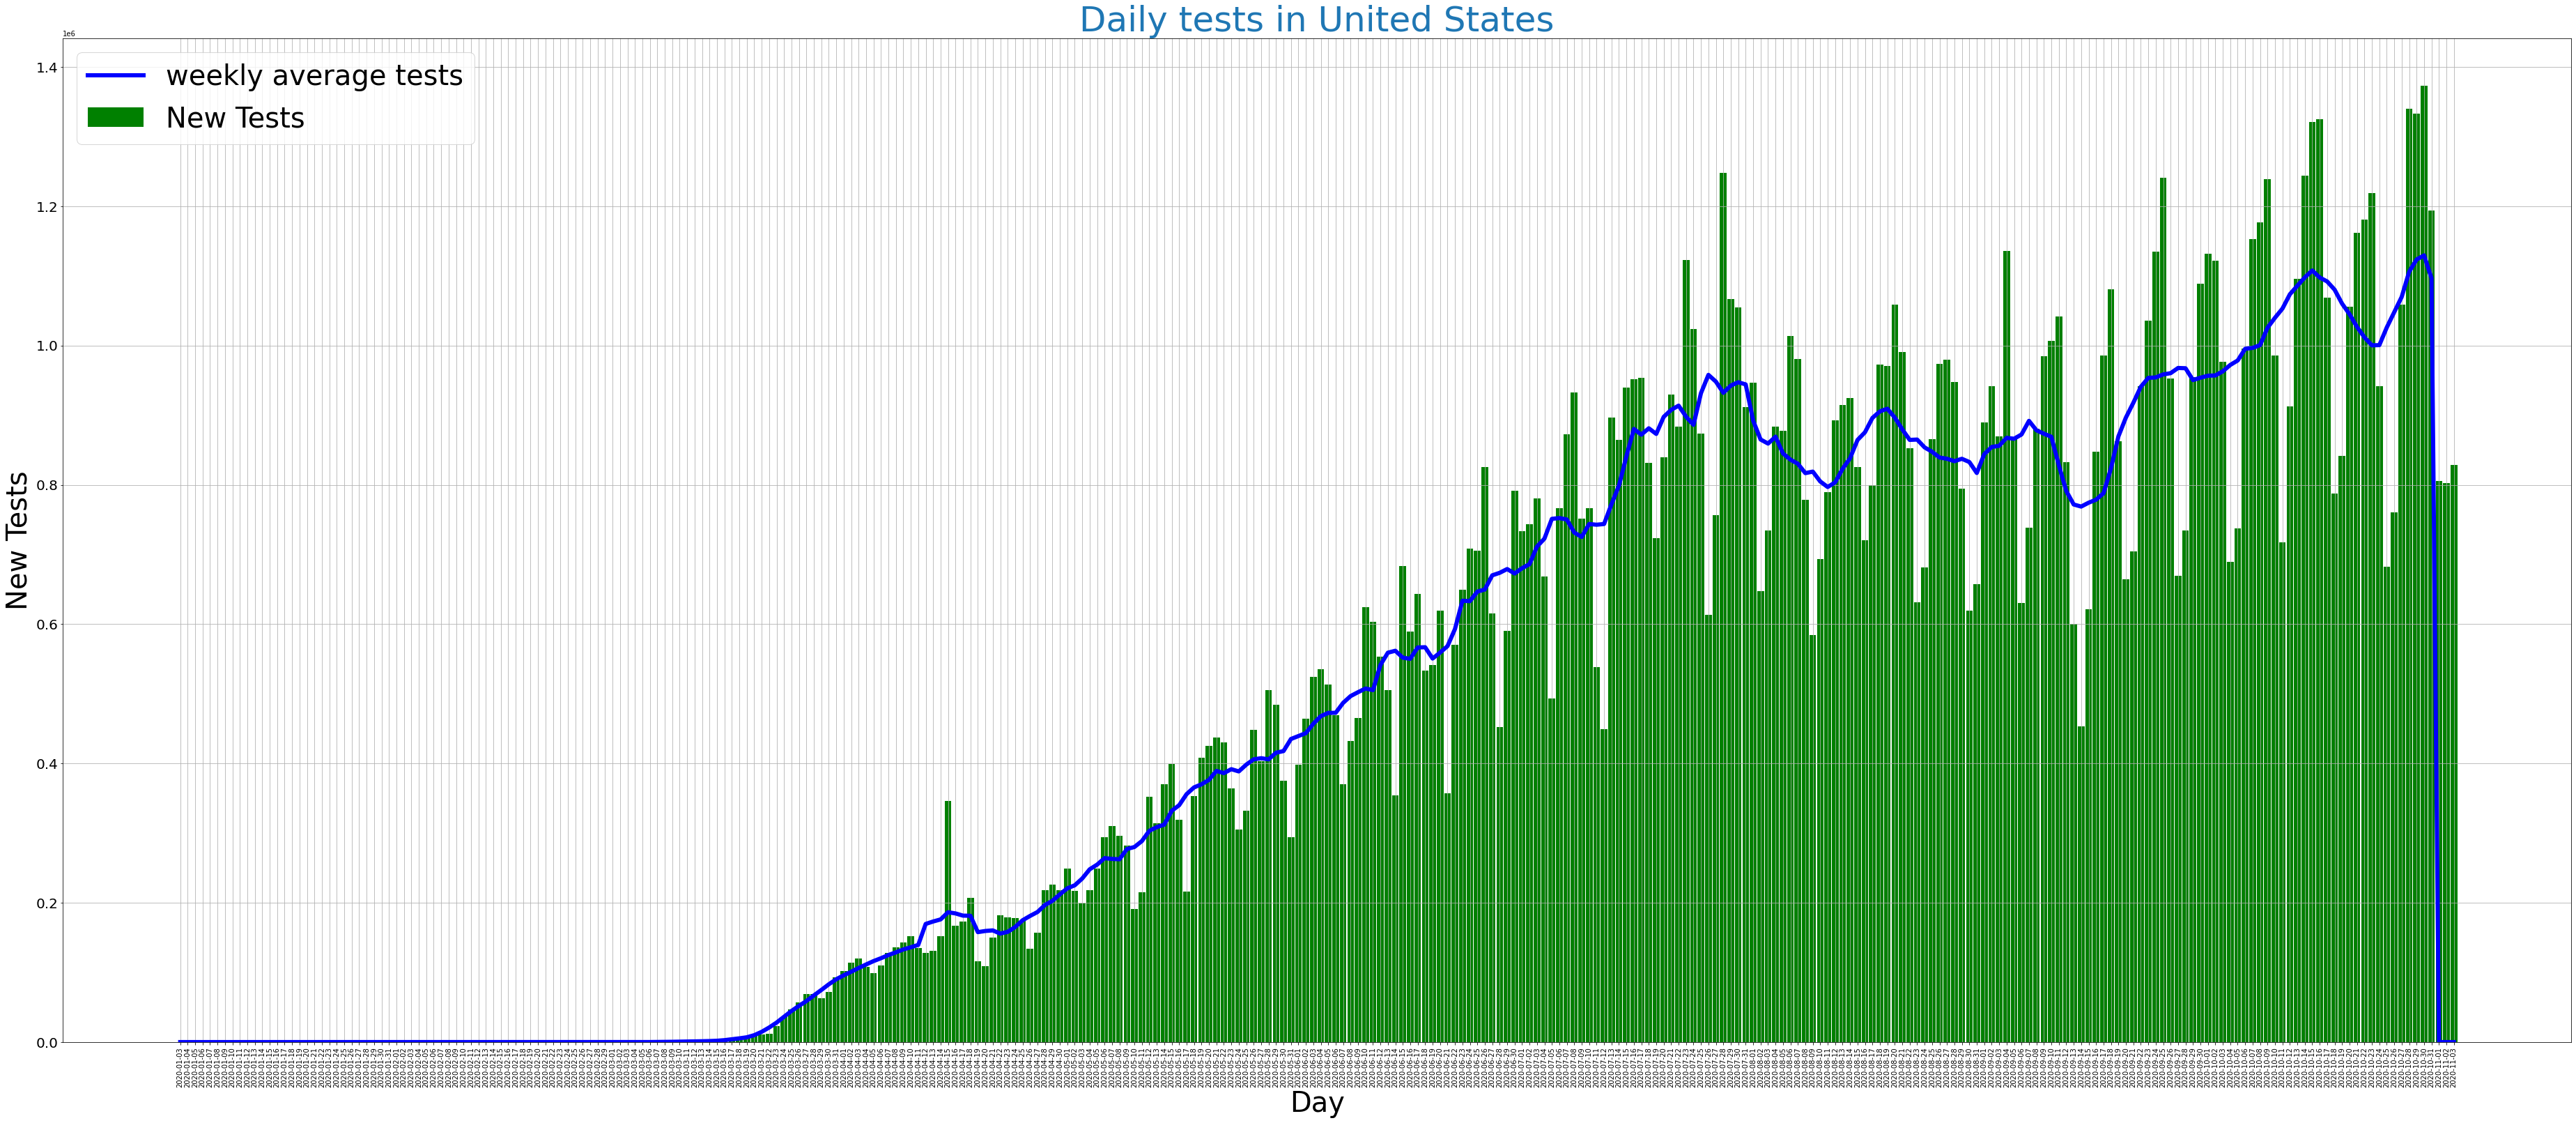

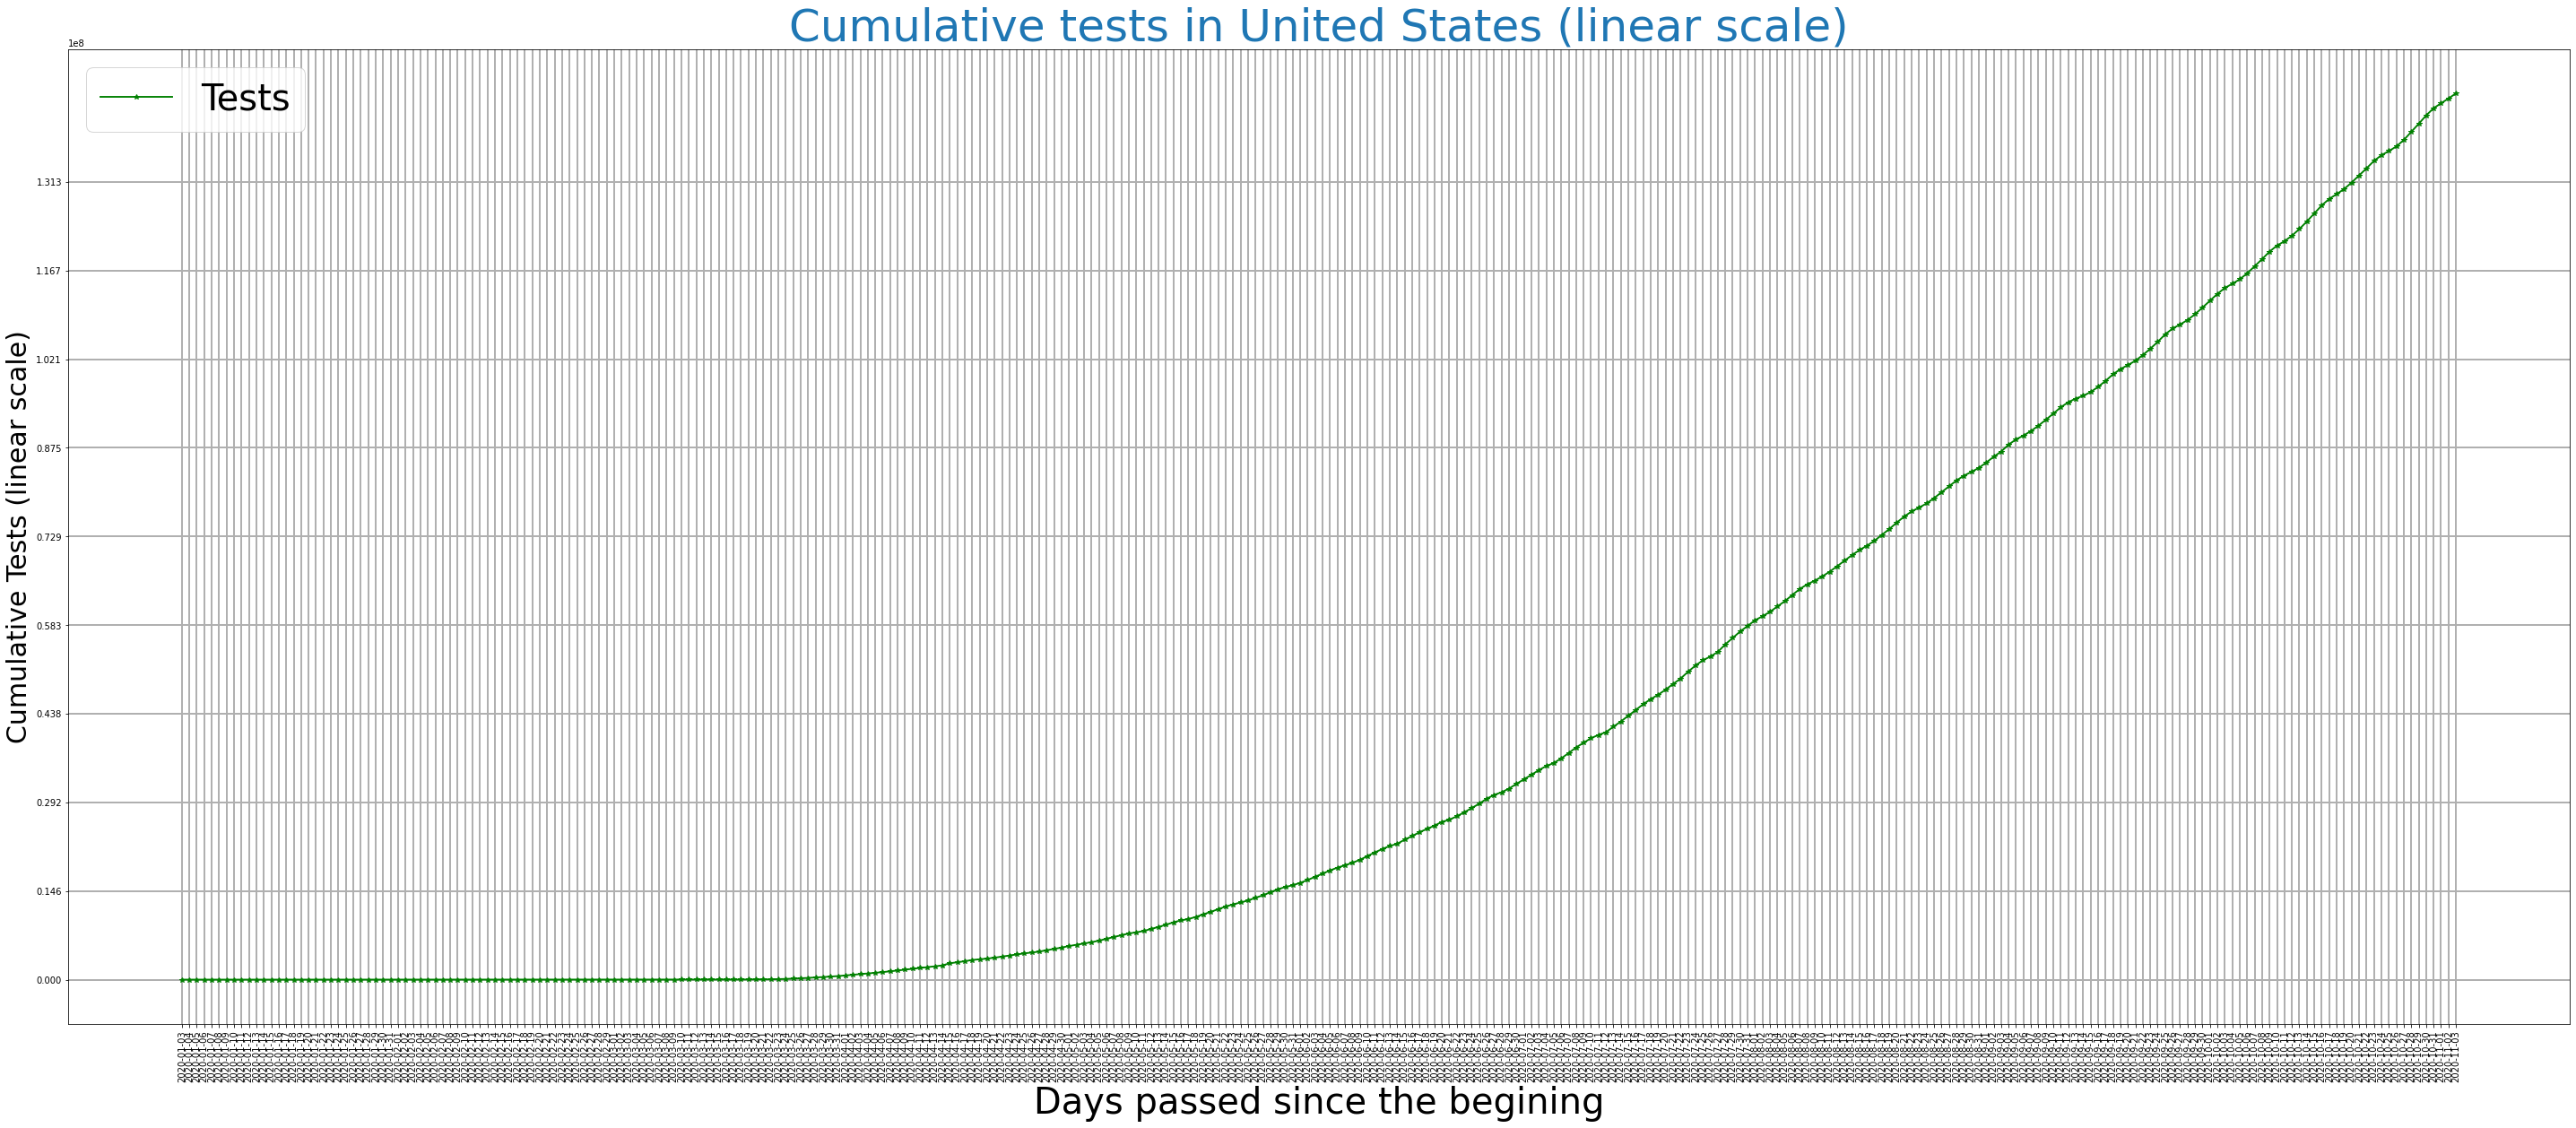

In [ ]:
weekly_tests=moving_av(new_tests[199],7)
plot_daily_tests(new_tests[199],weekly_tests,"in "+all_countries[199])
plot_cum_tests(cumulative_tests[199],"in "+all_countries[199],"linear",cumulative_tests[14][-1])

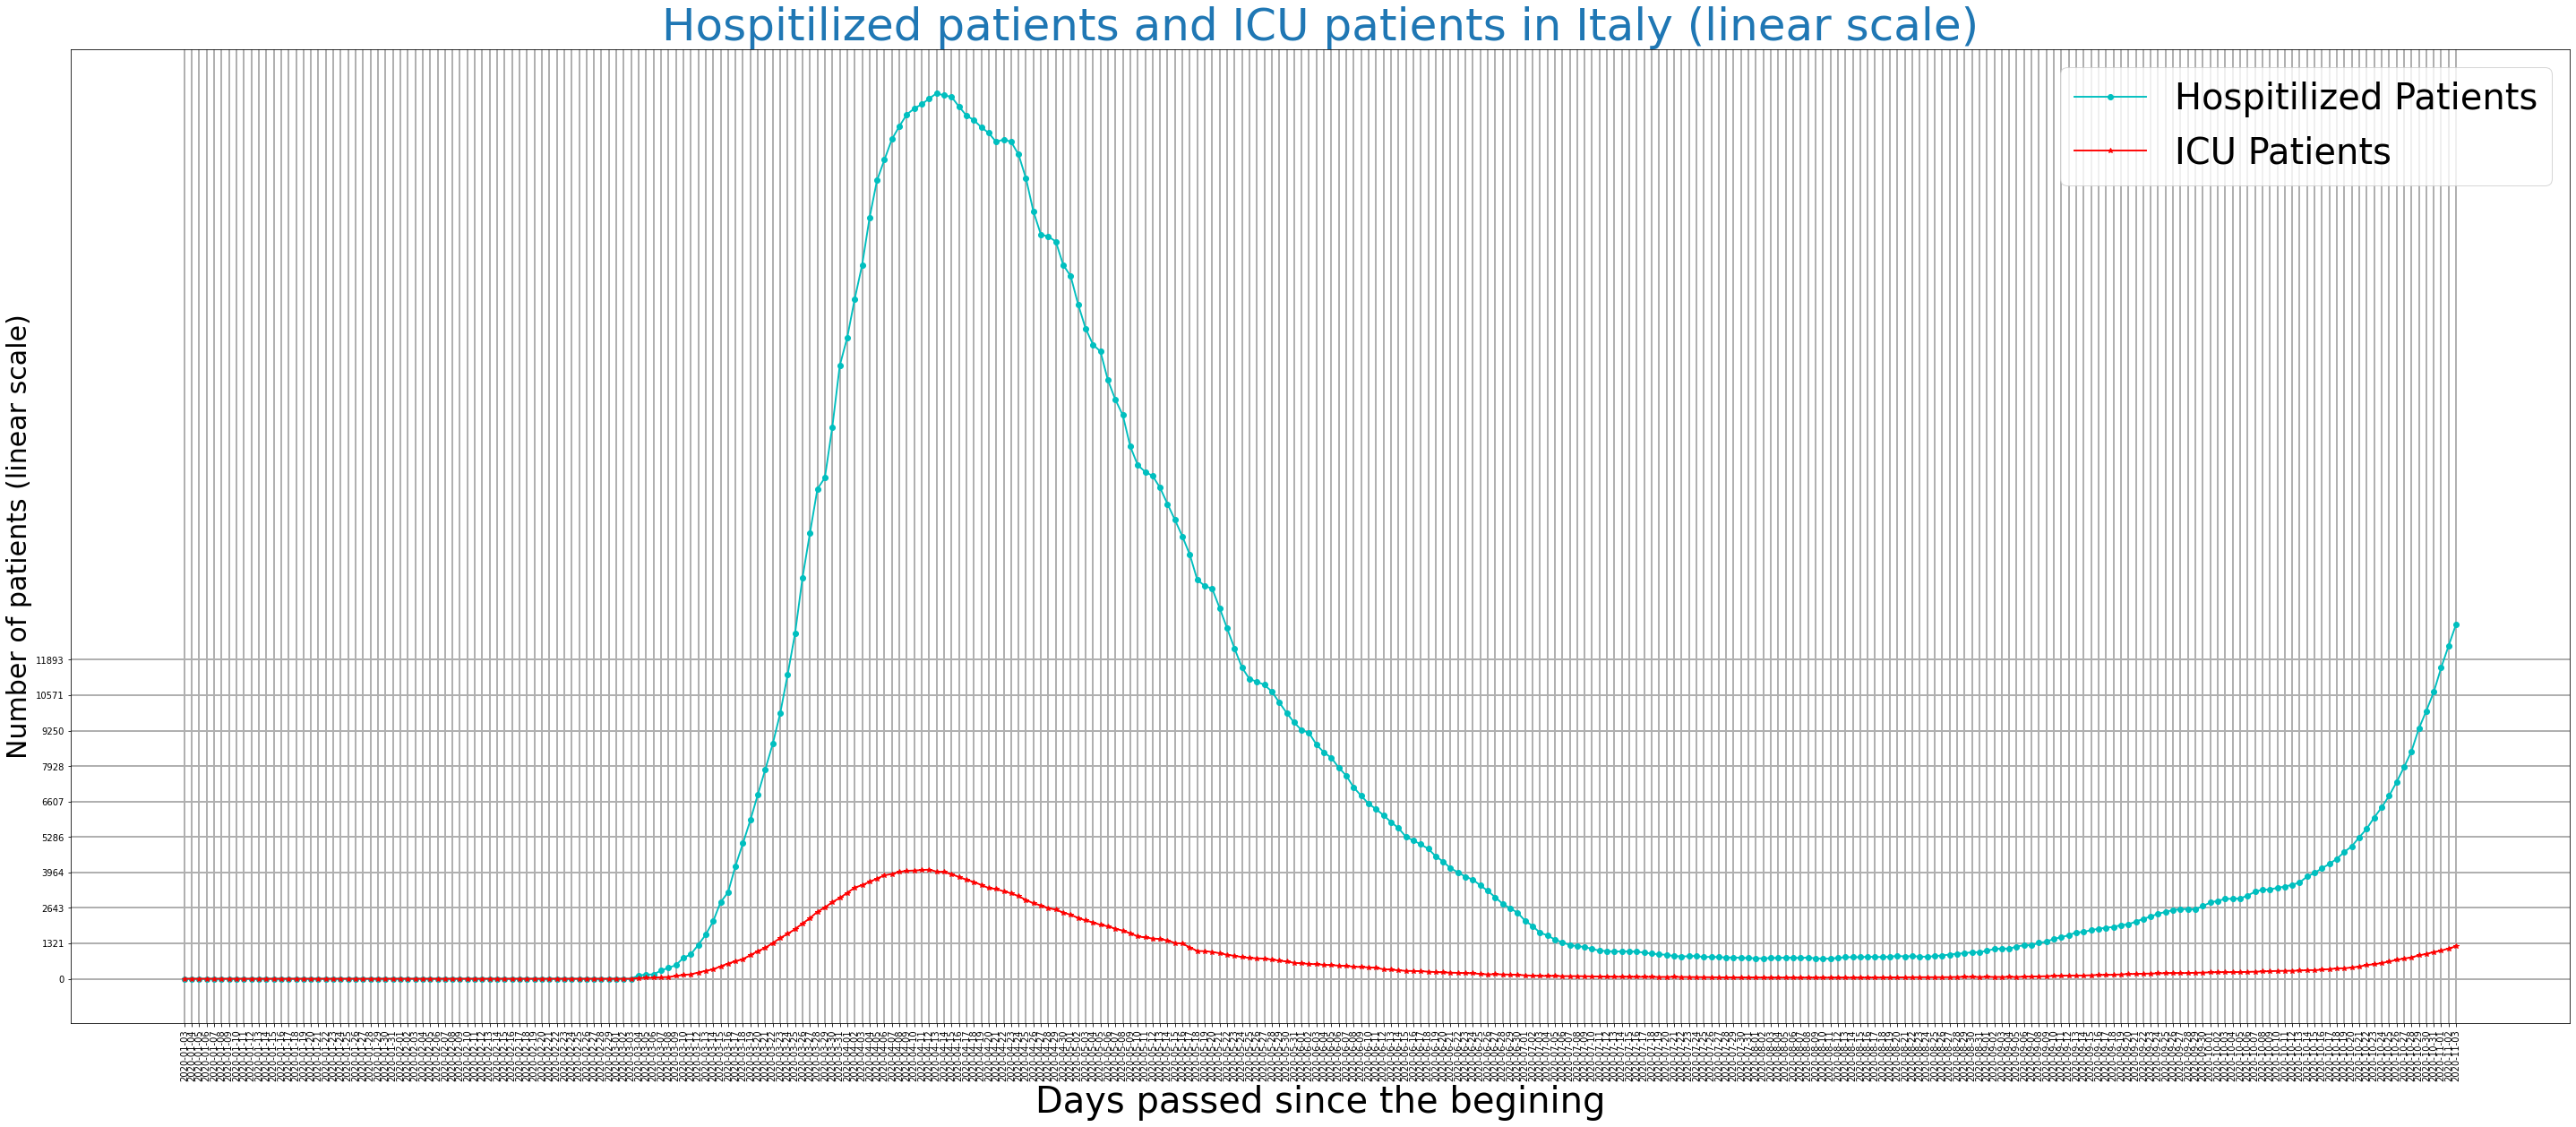

In [ ]:
plot_patients(hosp_patients[97],icu_patients[97],"in "+all_countries[97],"linear",hosp_patients[97][-1])

In [ ]:
  def plot_pie_charts(tlist, index, title):
      S = 0
      xlist = []
      ylist = []
      sorted_list = sorted(tlist, key=itemgetter(index),reverse=True)
      for i in range(0,11):
        if (i!=10):
          xlist.append(sorted_list[i][index])
          ylist.append(sorted_list[i][0])
        else:
          for j in range(i,len(countries)):
            S = S + sorted_list[j][index]
          xlist.append(S)
          ylist.append('Others')

      c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold', 'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
      plt.figure(figsize=(16,14))
      plt.title(title, size=16)
      plt.pie(xlist, colors=c,shadow=True, labels=xlist)
      plt.legend(ylist, loc='upper left', fontsize=11)
      plt.show()


In [ ]:
def plot_top5(tlist1,tlist2,index1,index2,string):
    sorted_list = sorted(tlist1,key=itemgetter(index1),reverse=True)
    name_list = sorted(tlist2,key=itemgetter(index2),reverse=True)
    plt.figure(figsize=(50,20))
    plt.title("Cumulative {} in the top 5 countries".format(string),fontsize=45)
    plt.xlabel('Days passed since the begining', fontsize=40)
    plt.ylabel("Cumulative {}".format(string),fontsize=30)
    for i in range(0,5):
      plt.plot(Dates_reported,sorted_list[i], linewidth=3.9, label=name_list[i][0])
    plt.xticks(rotation=90)
    plt.yticks(size=20)
    plt.legend(loc='best',fontsize=30)
    plt.grid(True, linewidth=2.0)
    plt.show()


In [ ]:
print("The total cases of COVID-19 are:",Total_cases)
print("The total deaths of COVID-19 are:",Total_deaths)
print("The World's Mortality Rate for COVID-19 is: {}%".format((Total_deaths/Total_cases)*100))
print("There are {} cases per 1 million and {} deaths per 1 million people all around the world".format(Wcases_per_million,Wdeaths_per_million))

The total cases of COVID-19 are: 46591622.0
The total deaths of COVID-19 are: 1201200.0
The World's Mortality Rate for COVID-19 is: 2.57814591644824%
There are 6101 cases per 1 million and 157 deaths per 1 million people all around the world


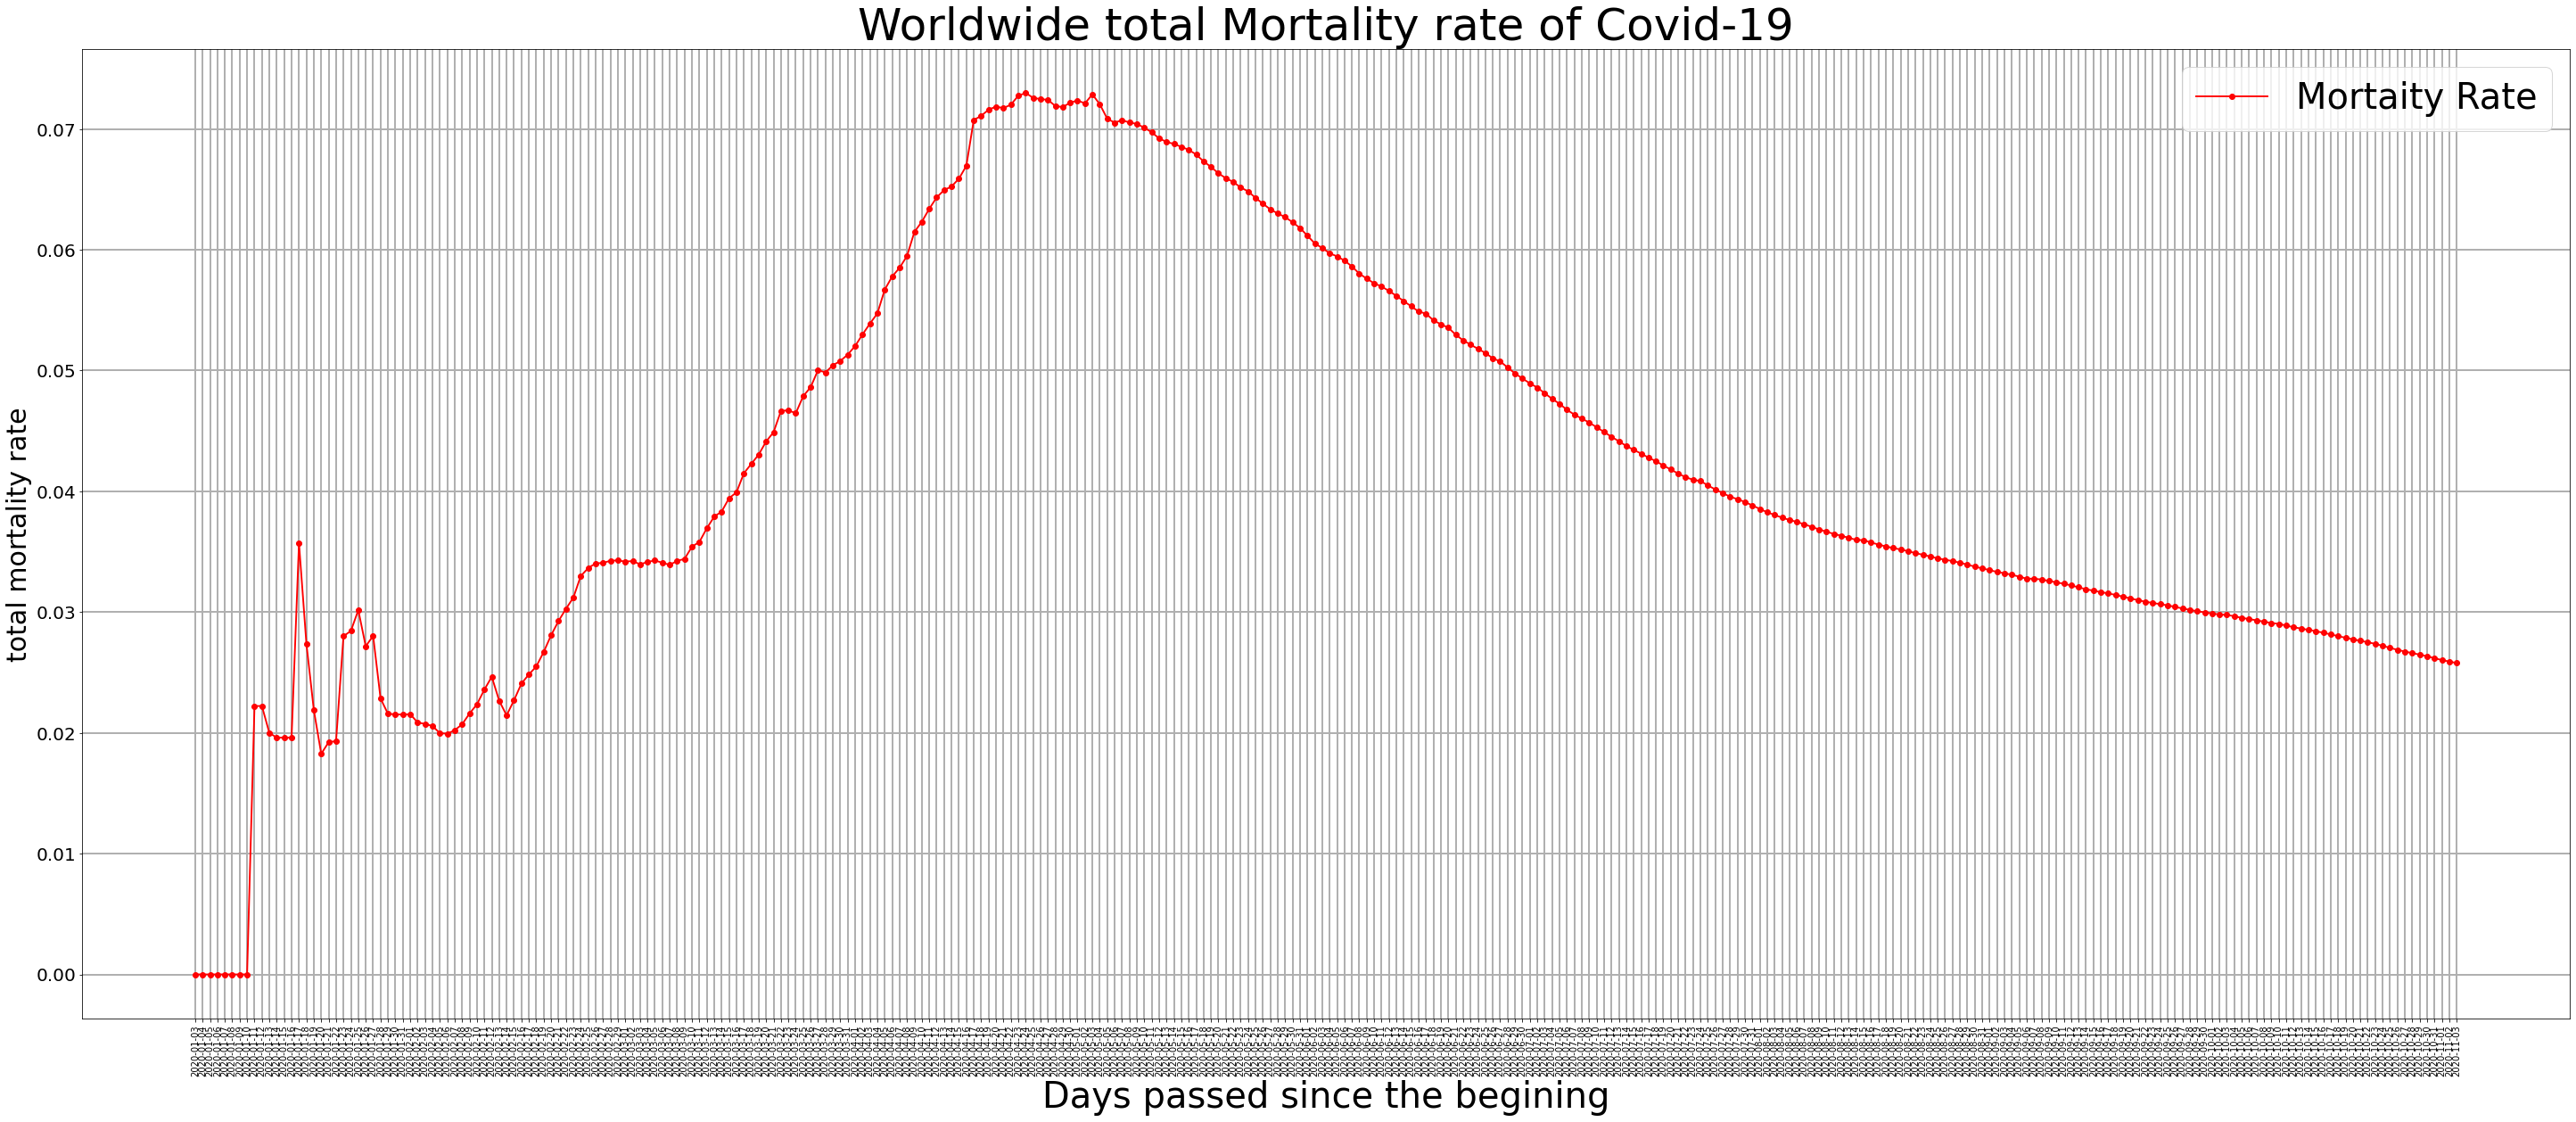

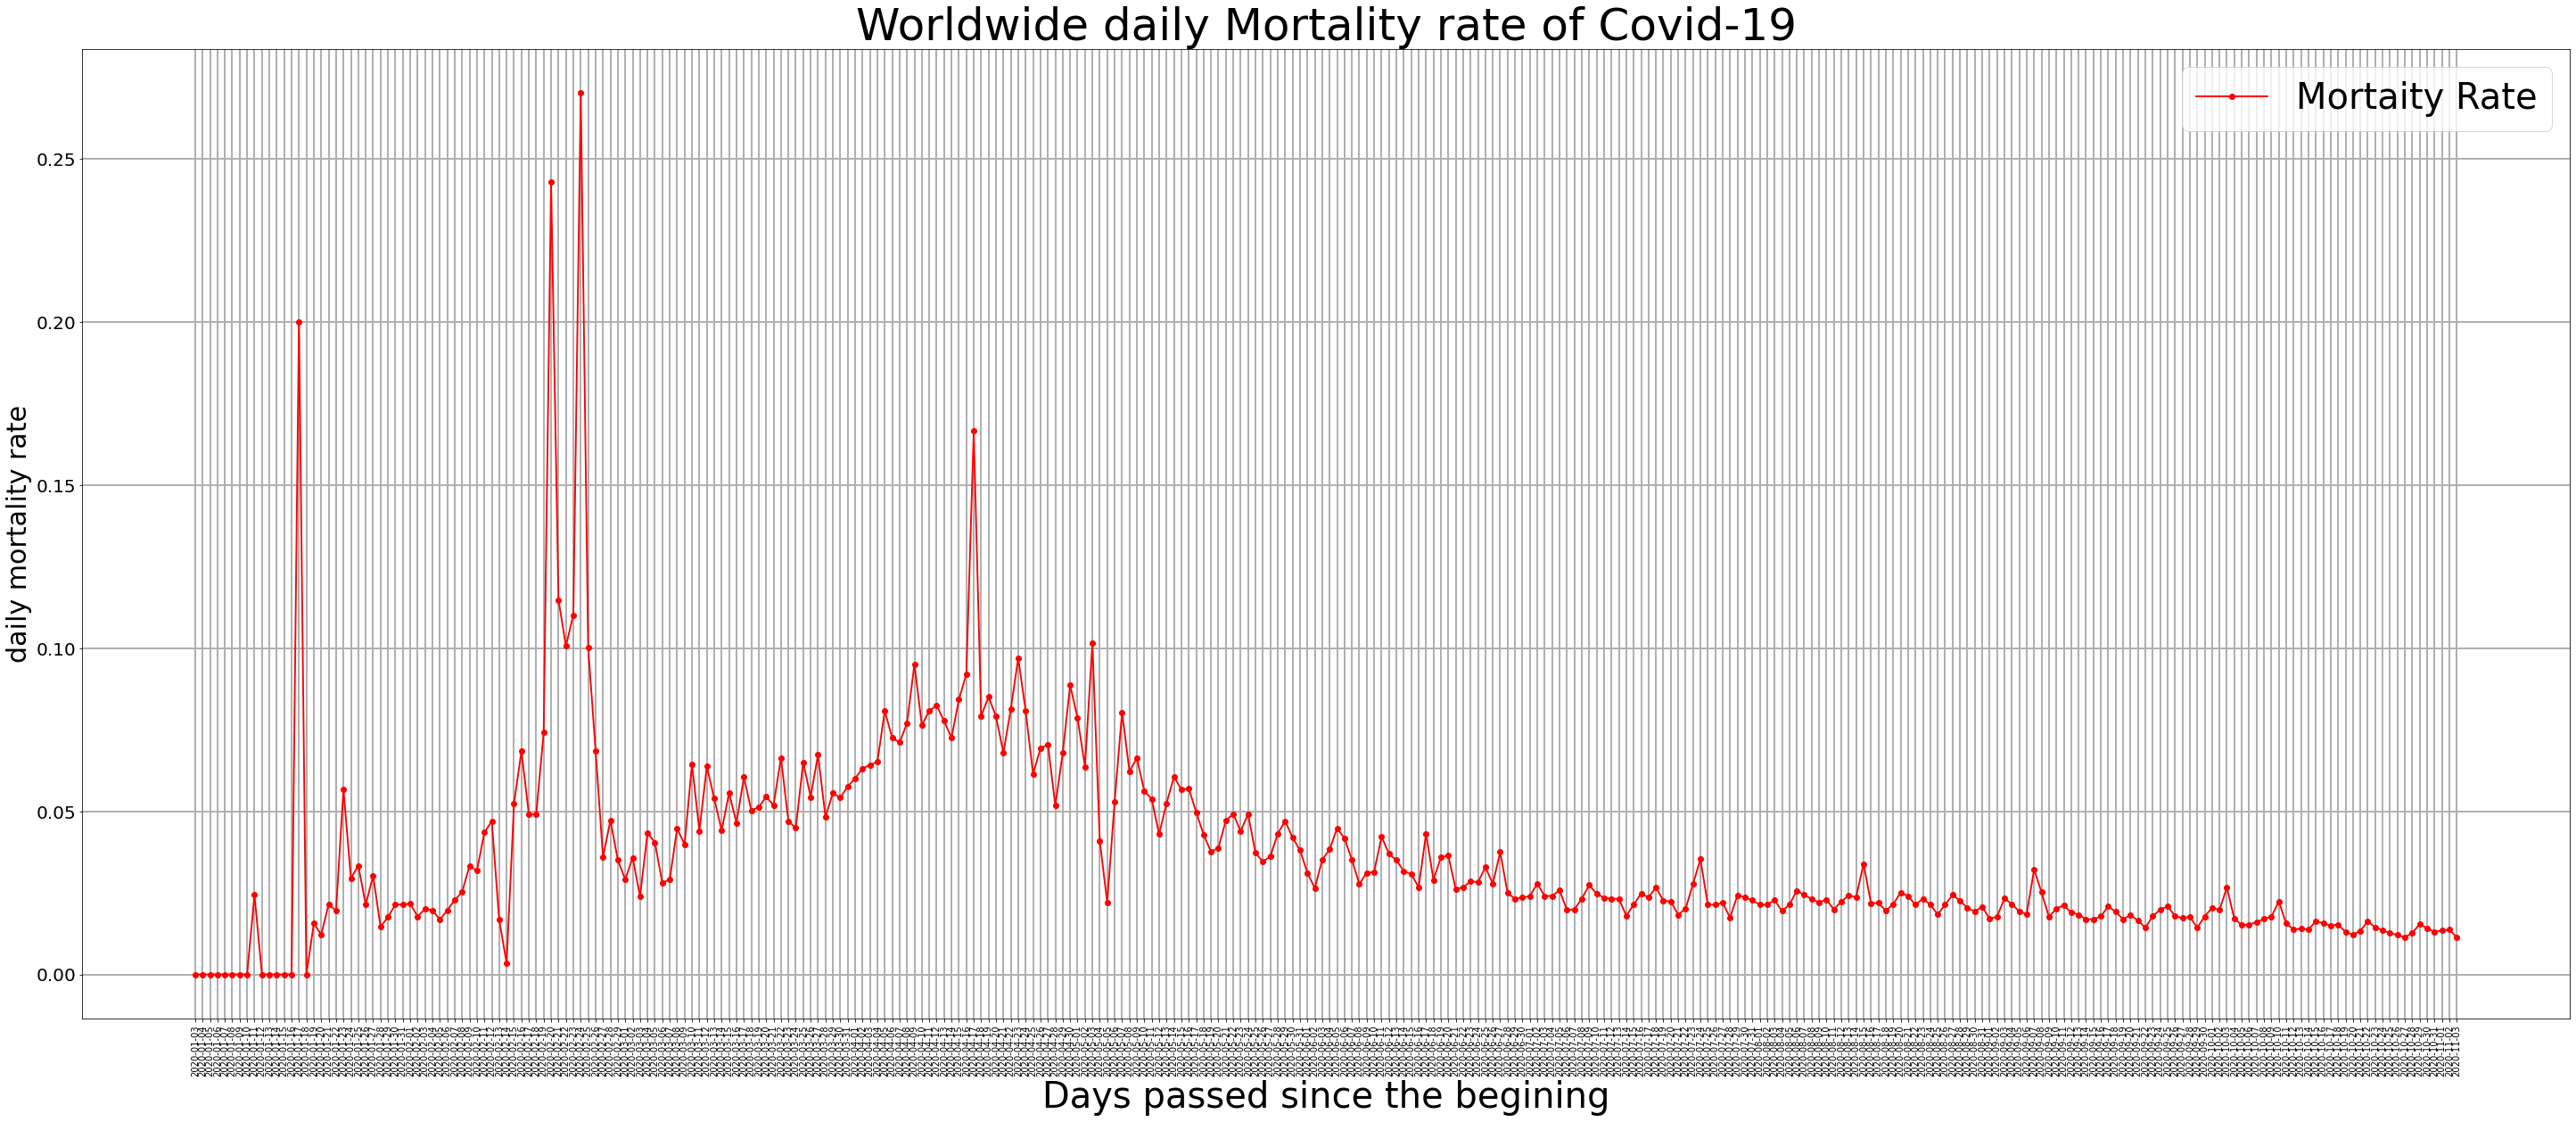

In [ ]:
plot_WorldMR(M_R_global_over_time,"total")
plot_WorldMR(M_R_global_per_day,"daily")

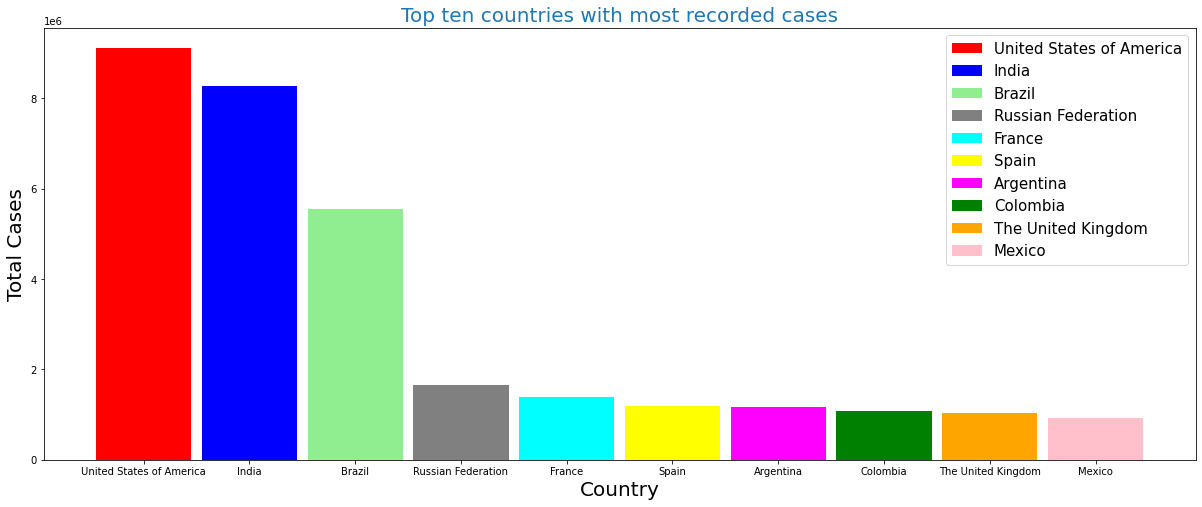

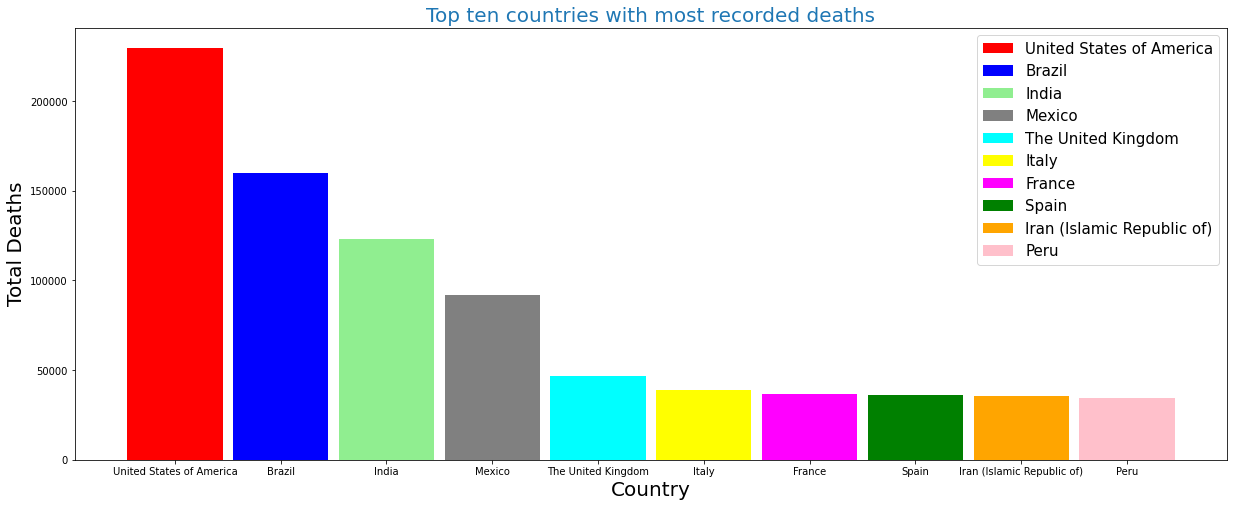

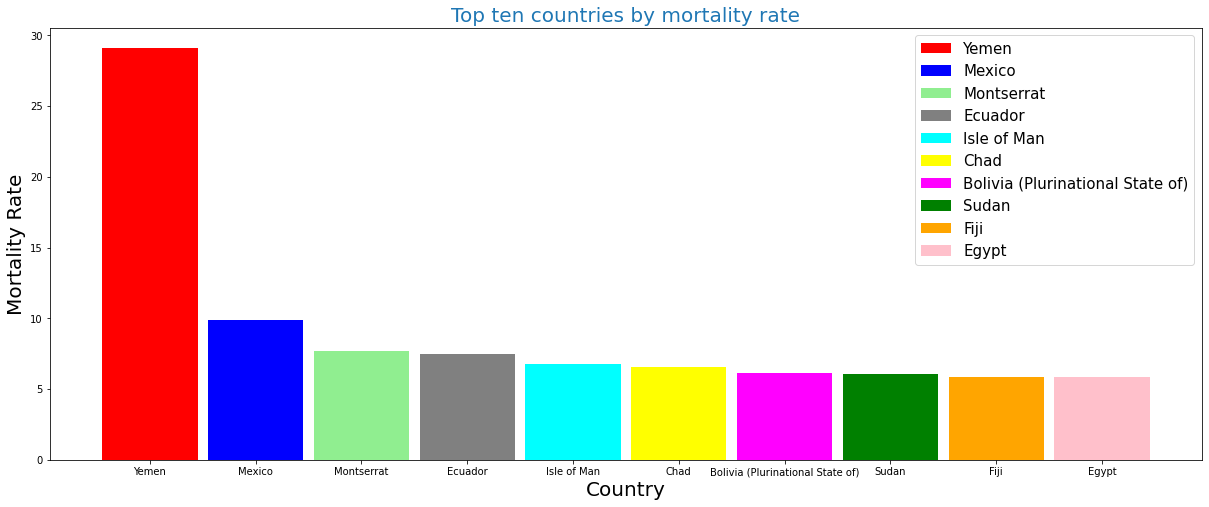

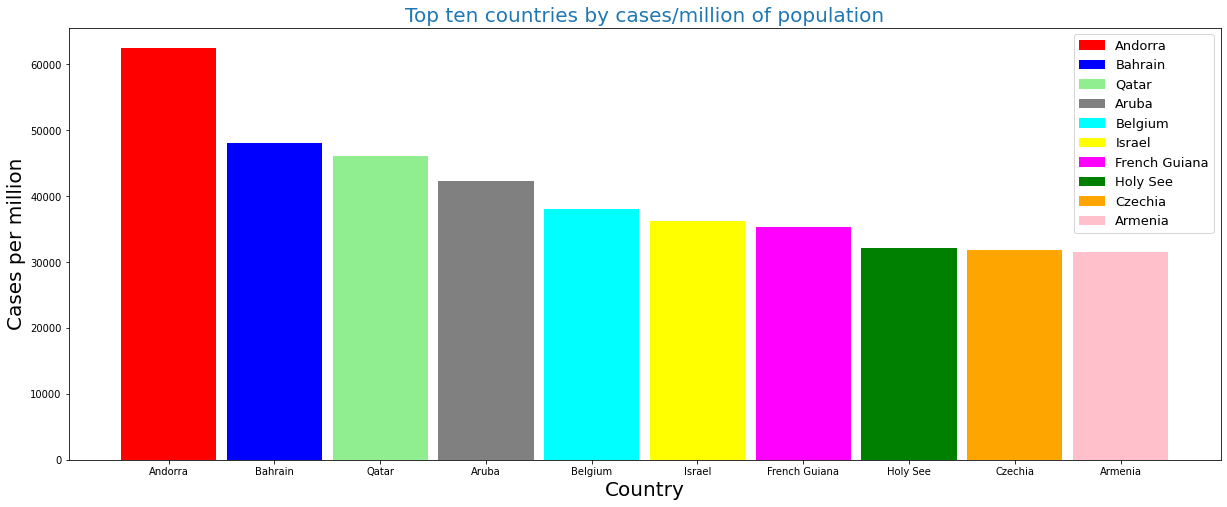

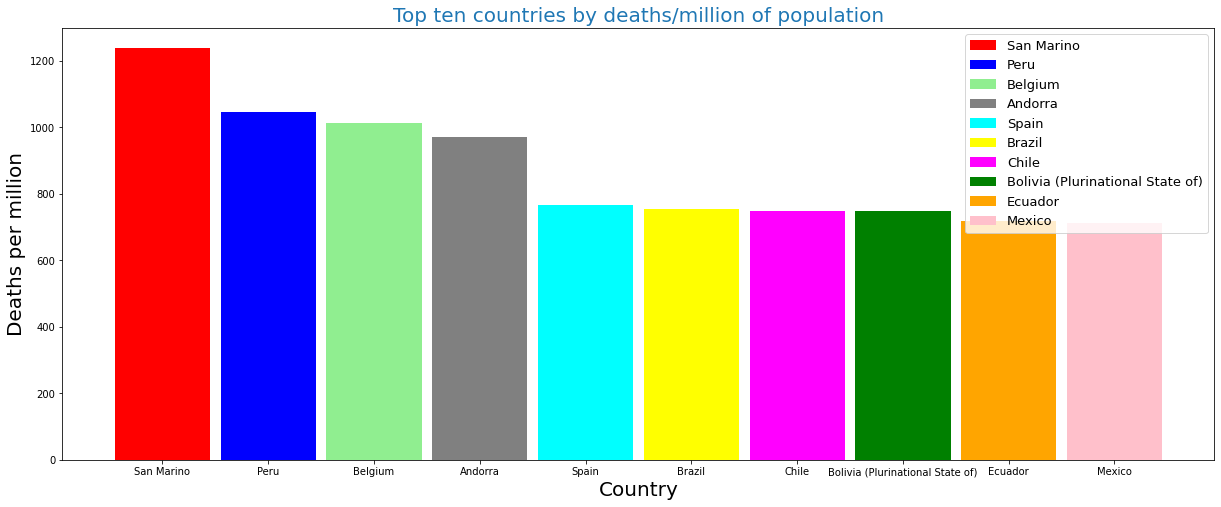

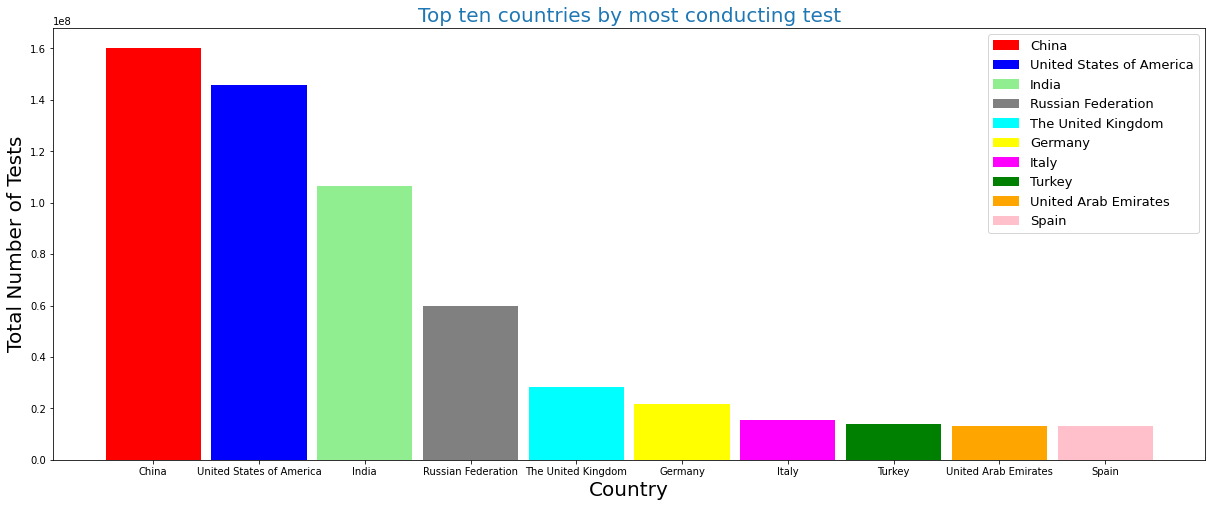

In [ ]:
plot_top10(Overall_per_country,1,'with most recorded cases','Total Cases',15)
plot_top10(Overall_per_country,2,'with most recorded deaths','Total Deaths',15)
plot_top10(Overall_per_country,3,'by mortality rate','Mortality Rate',15)
plot_top10(Overall_per_country,4,'by cases/million of population','Cases per million',13)
plot_top10(Overall_per_country,5,'by deaths/million of population','Deaths per million',13)
plot_top10(Overall_per_country,11,'by most conducting test','Total Number of Tests',13)

In [ ]:
#for i in range(len(countries)):
#  weekly_deaths=moving_av(New_deaths[i],7)
#  weekly_cases=moving_av(New_cases[i],7)
#  plot_daily(New_cases[i],New_deaths[i],weekly_cases,weekly_deaths,"in "+countries[i])

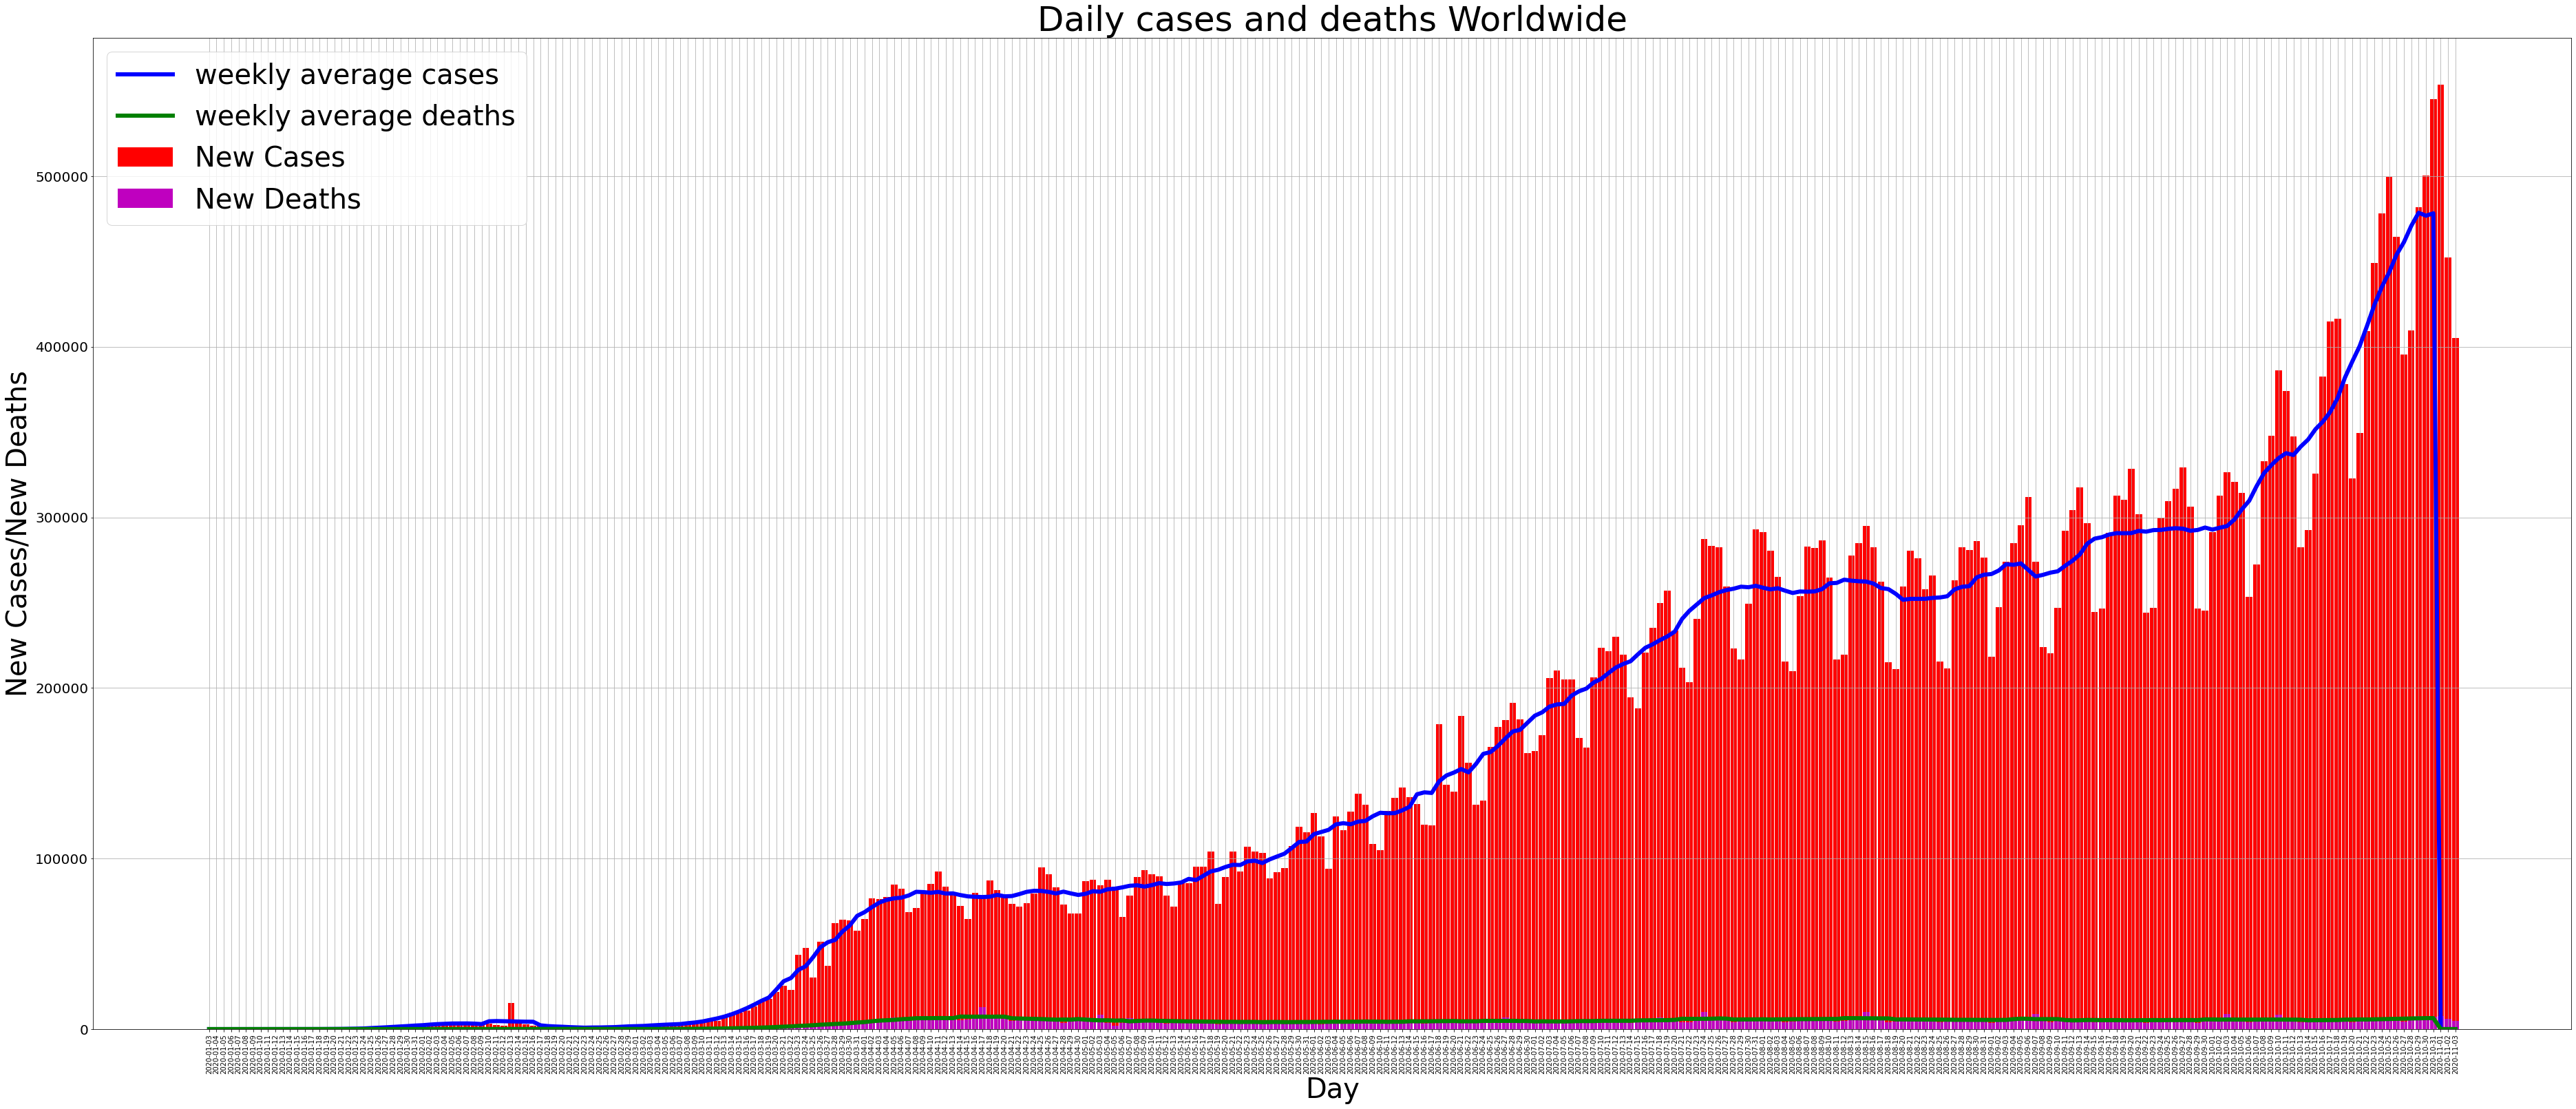

In [ ]:
weekly_deaths=moving_av(Daily_World_deaths,7)
weekly_cases=moving_av(Daily_World_cases,7)
plot_daily(Daily_World_cases,Daily_World_deaths,weekly_cases,weekly_deaths,'Worldwide')

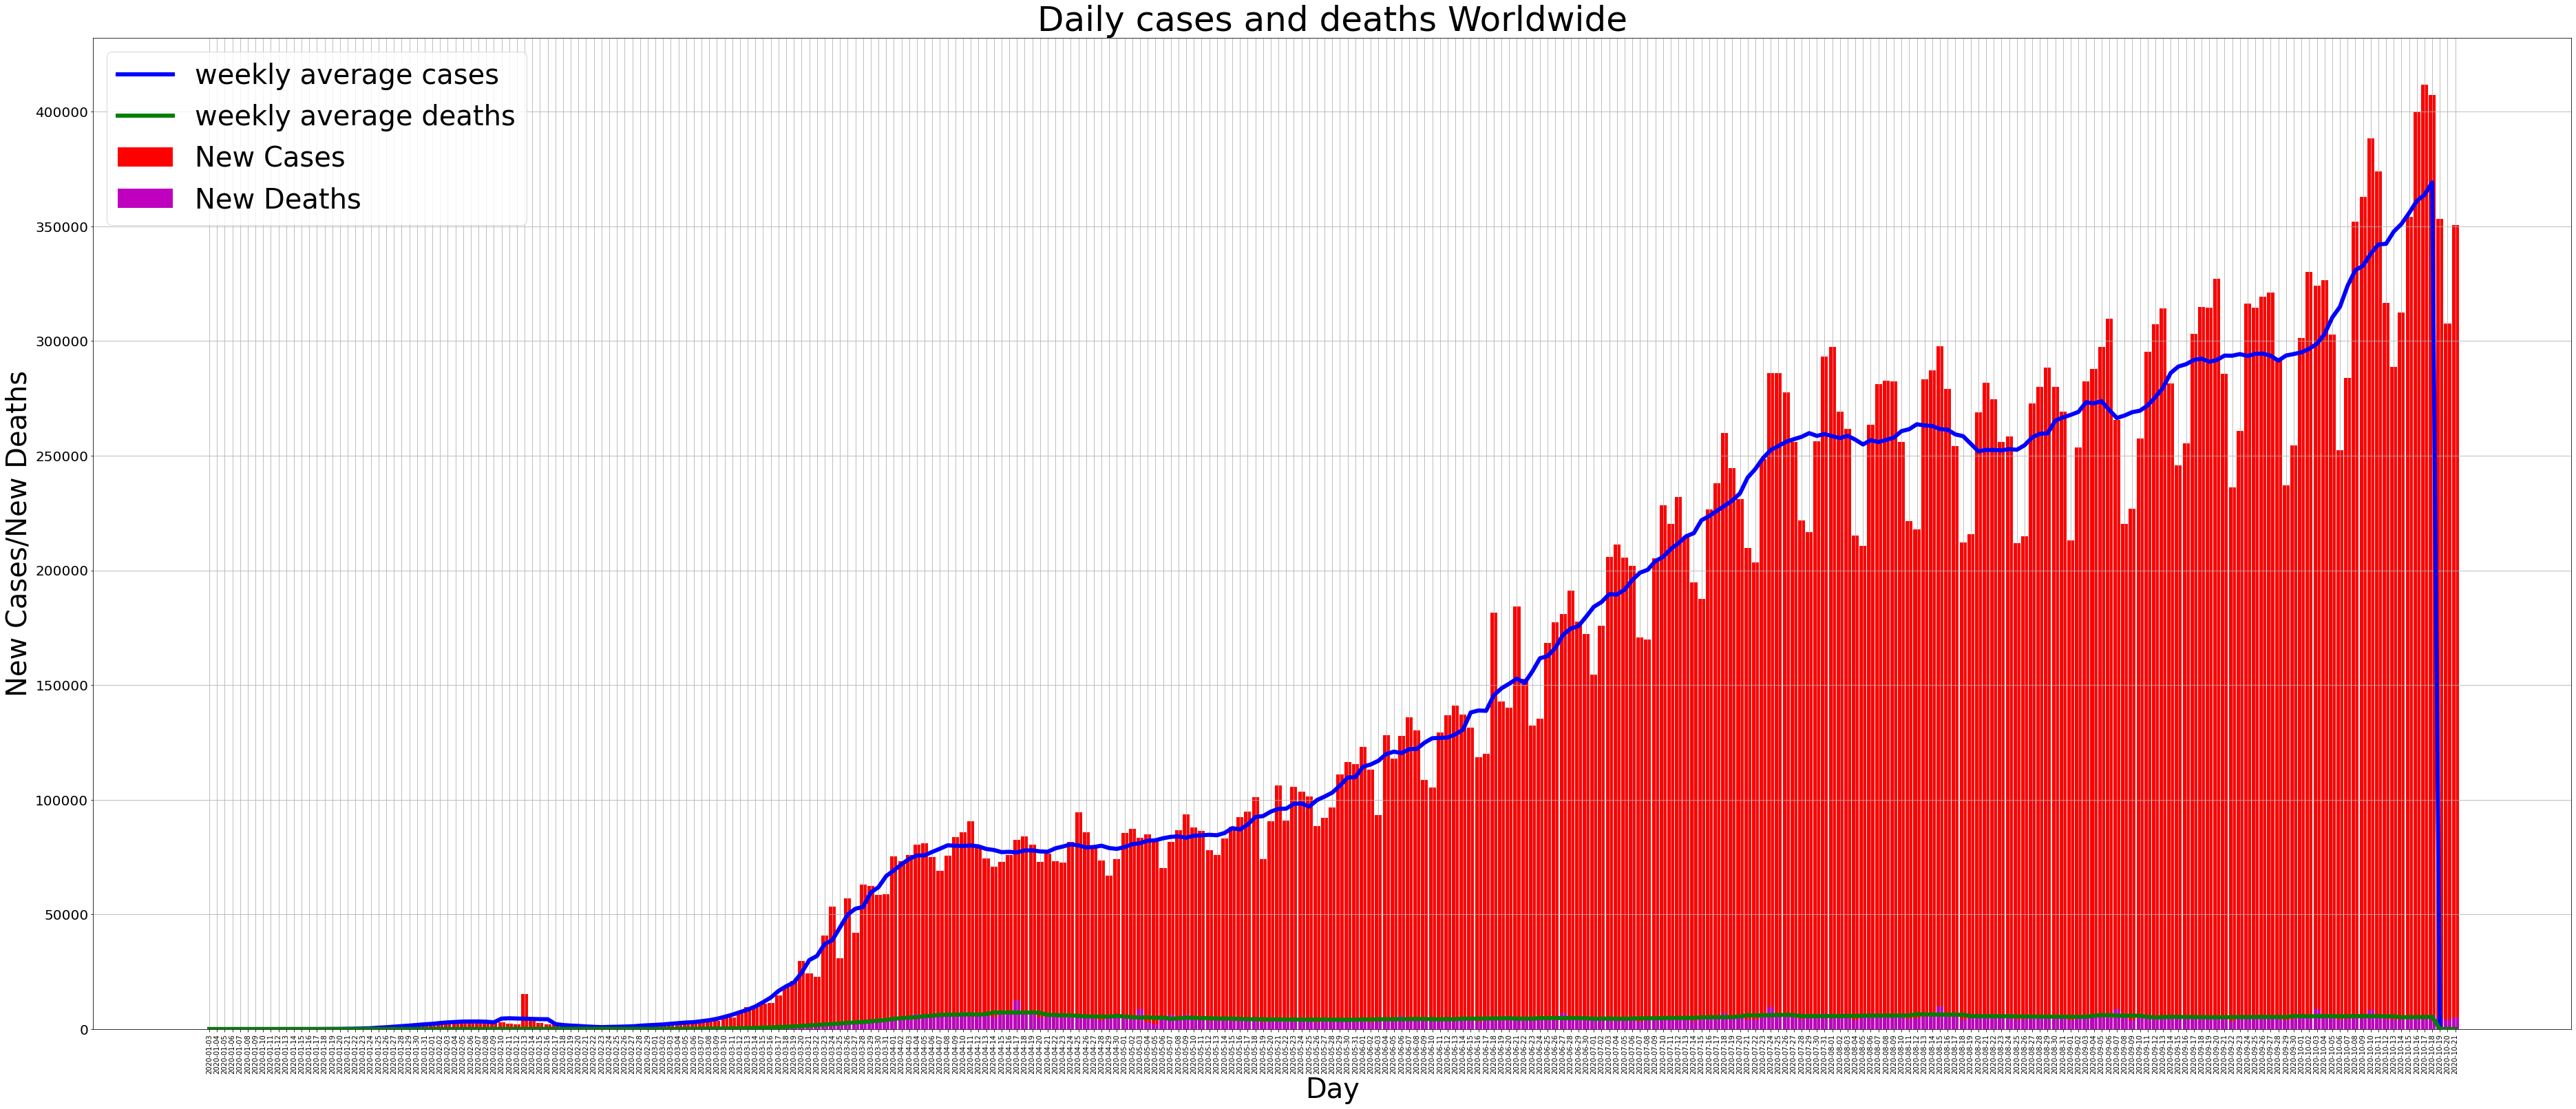

In [ ]:
weekly_deaths=moving_av(Daily_World_deaths,7)
weekly_cases=moving_av(Daily_World_cases,7)
plot_daily(Daily_World_cases,Daily_World_deaths,weekly_cases,weekly_deaths,'Worldwide')

In [ ]:
#for i in range(len(countries)):
#  plot_cumulative(Cumulative_cases[i],Cumulative_deaths[i],"in "+countries[i],"linear",Cumulative_cases[i][-1])
#  plot_cumulative(Cumulative_cases[i],Cumulative_deaths[i],"in "+countries[i],"log",Cumulative_cases[i][-1])

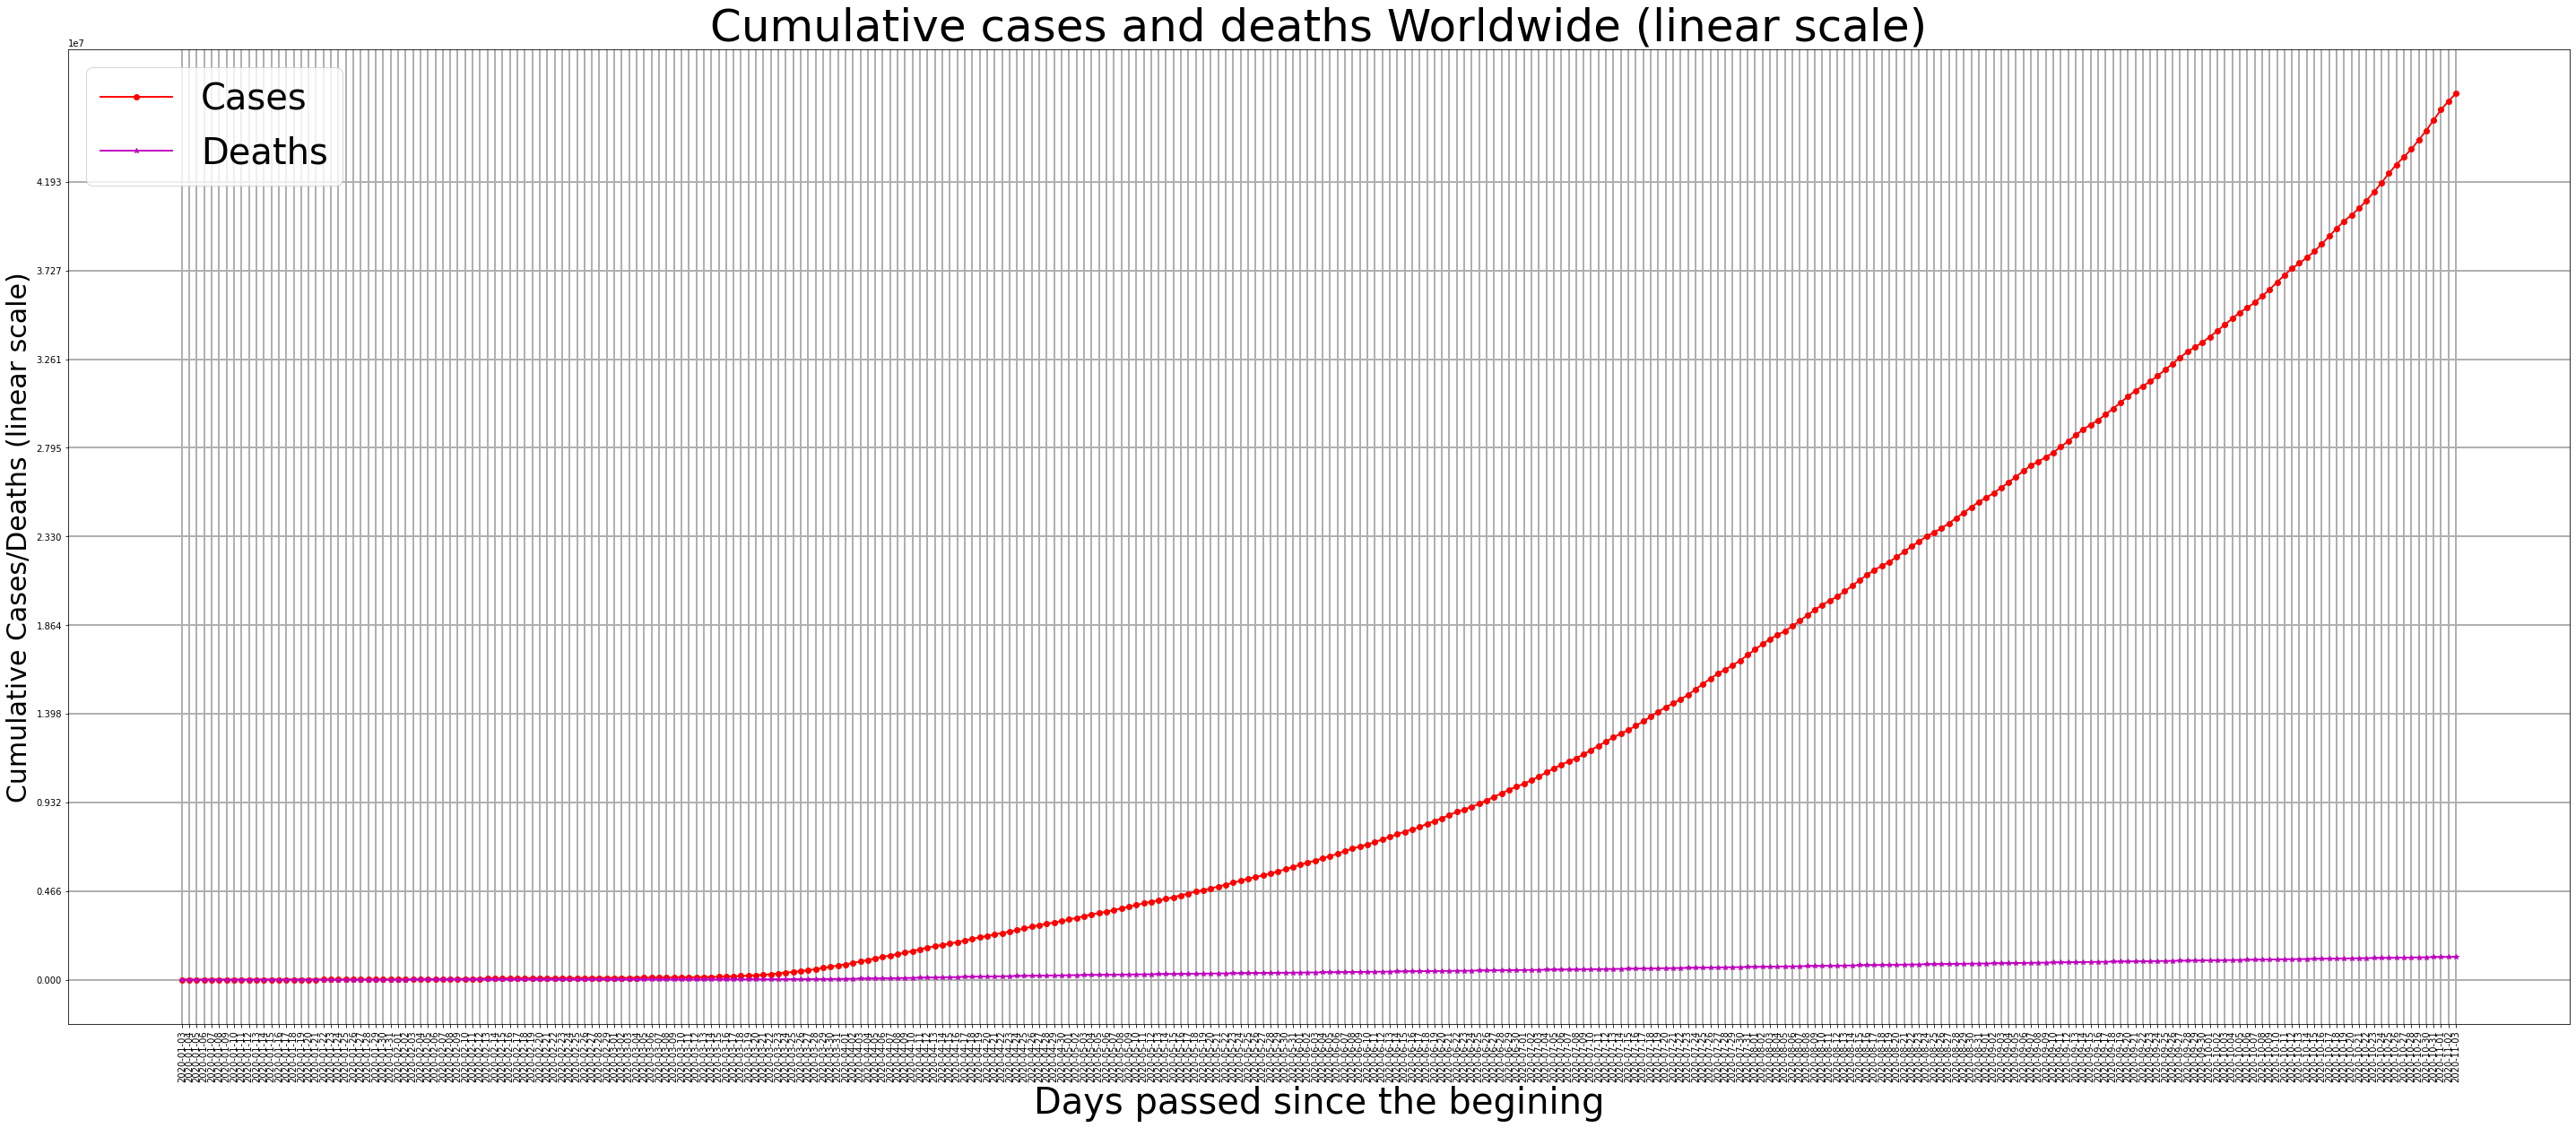

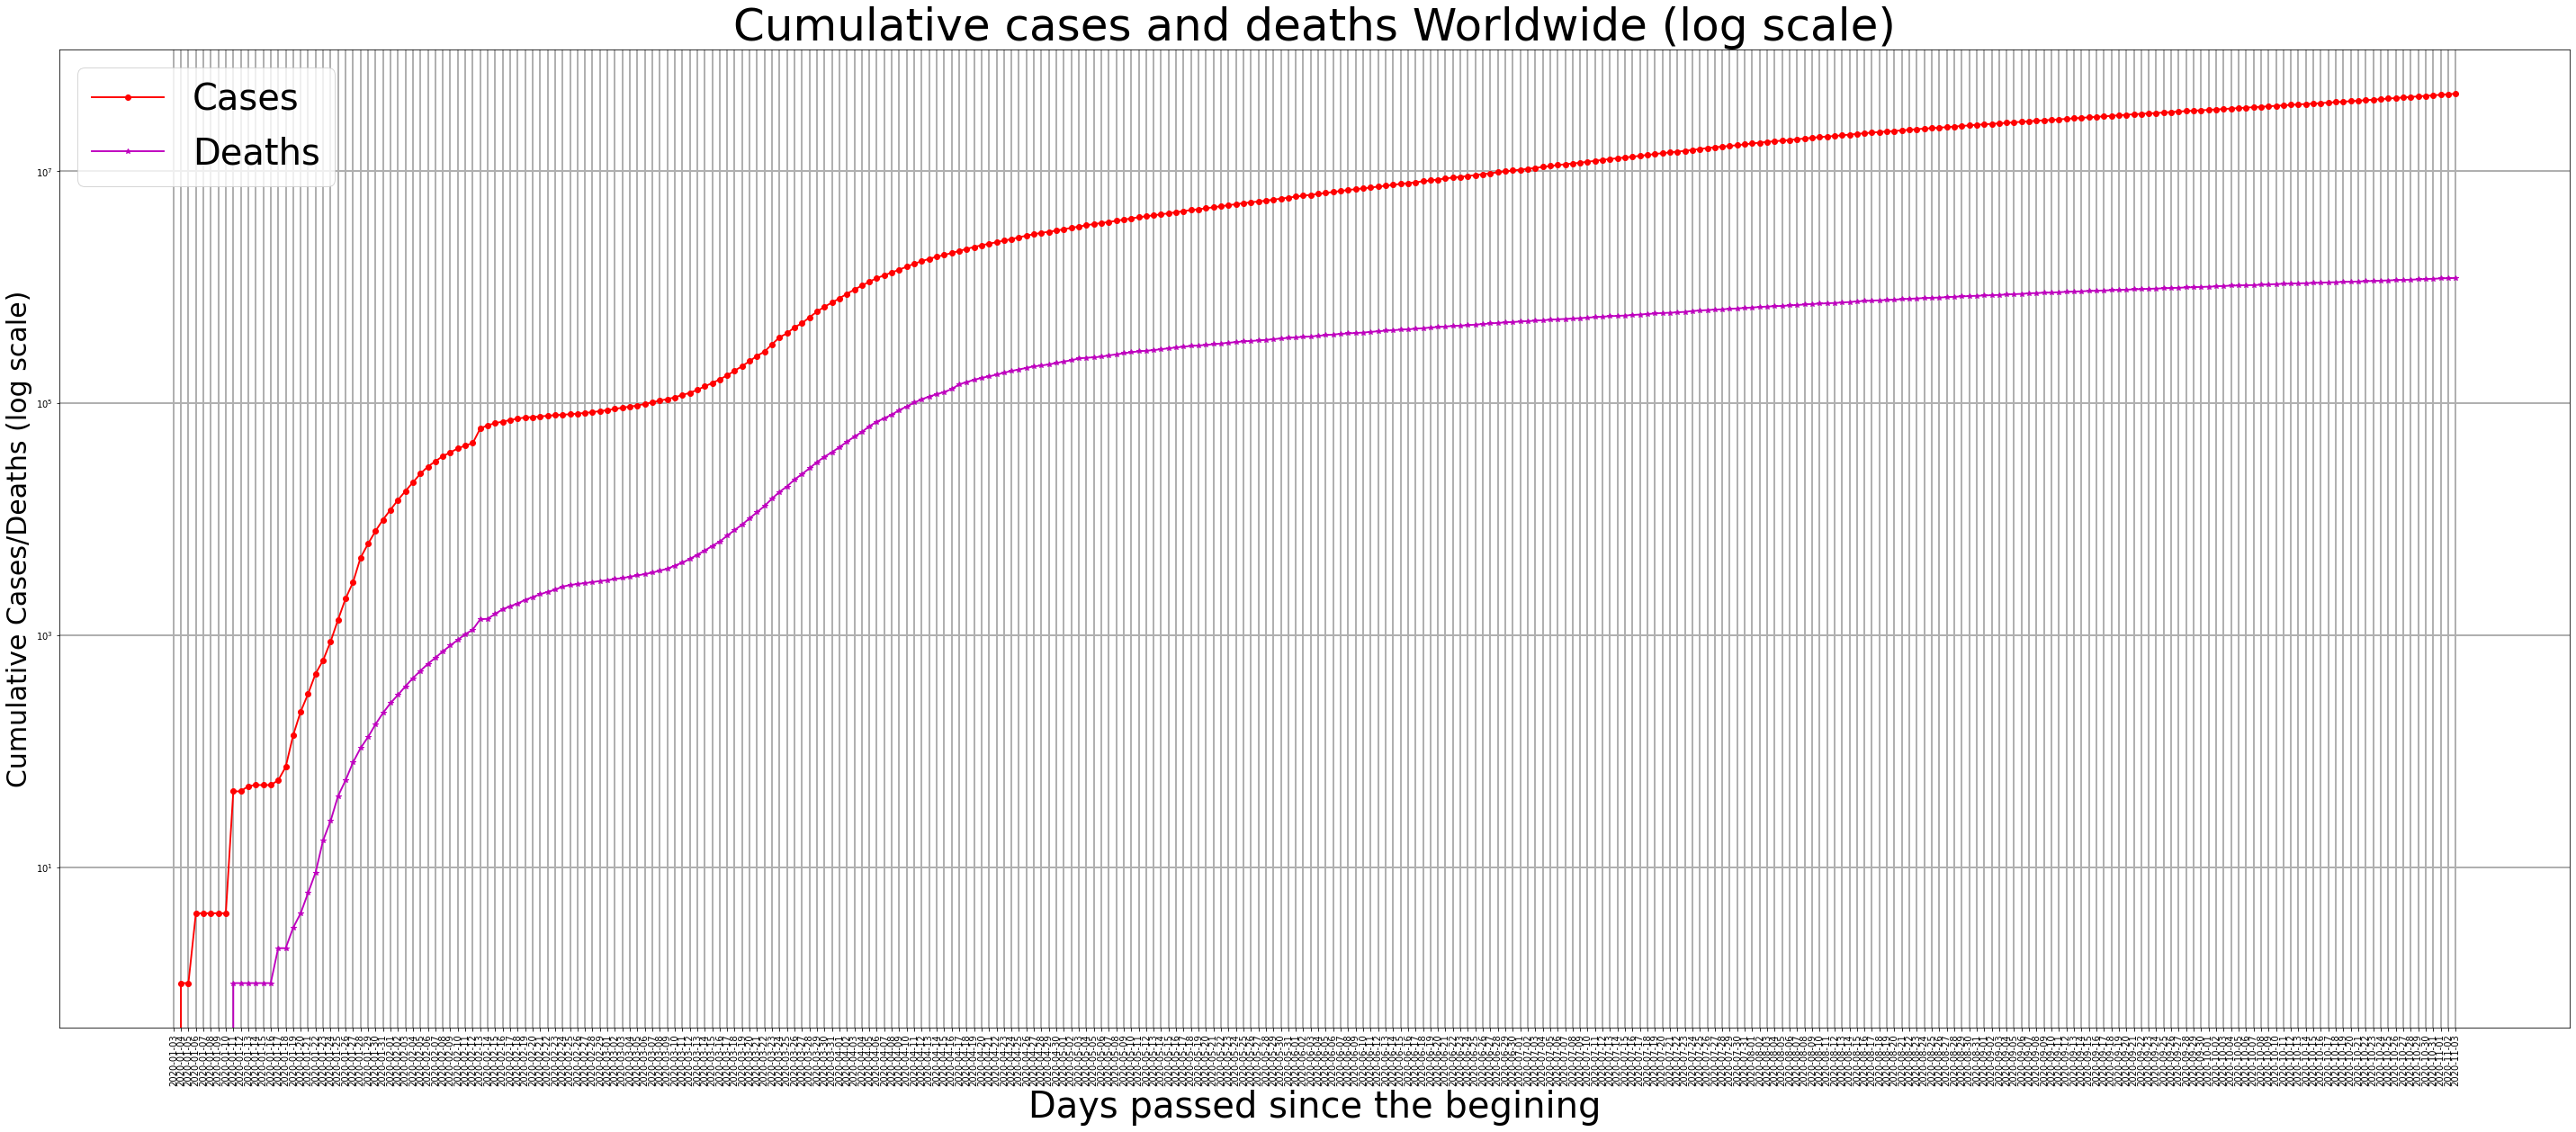

In [ ]:
plot_cumulative(World_cases,World_deaths,"Worldwide","linear",1)
plot_cumulative(World_cases,World_deaths,"Worldwide","log",1)

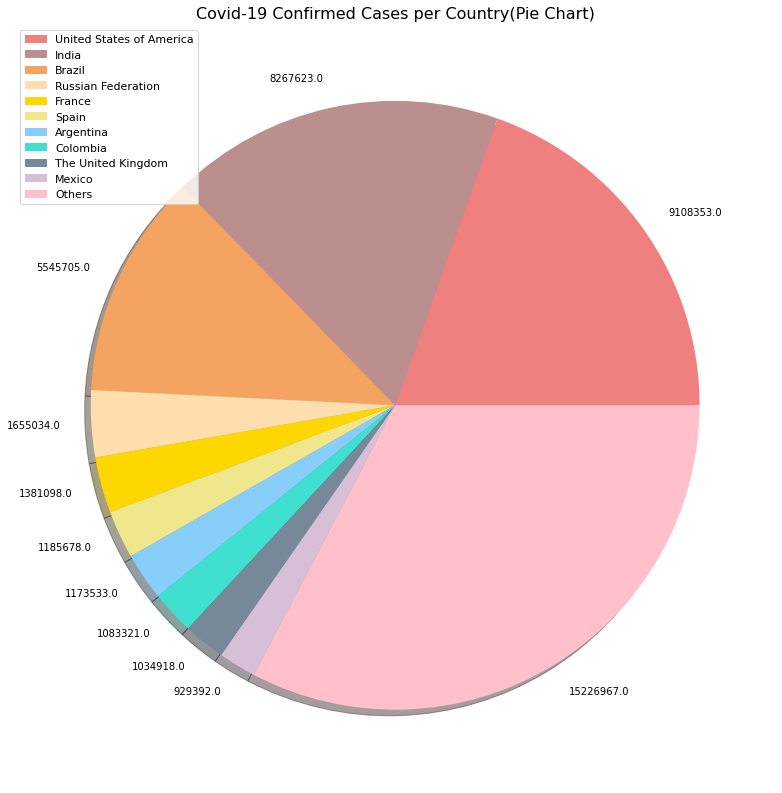

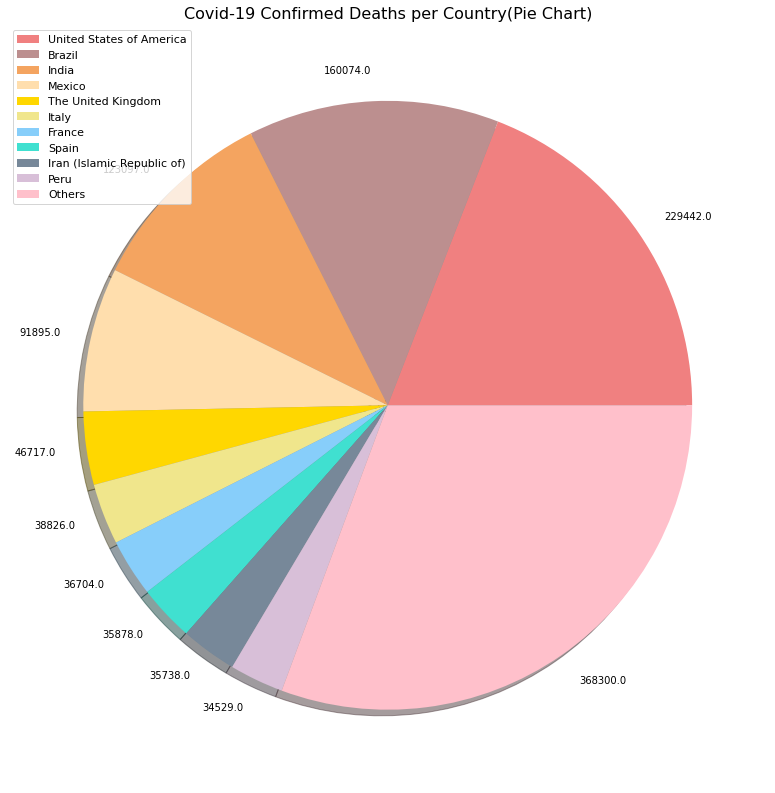

In [ ]:
plot_pie_charts(Overall_per_country, 1, 'Covid-19 Confirmed Cases per Country(Pie Chart)')
plot_pie_charts(Overall_per_country, 2, 'Covid-19 Confirmed Deaths per Country(Pie Chart)')

In [ ]:
temp_list = sorted(Overall_per_country,key=itemgetter(1),reverse=True)
country_df = pd.DataFrame({'Country Name':[c[0] for c in temp_list], 'Number of Confirmed Cases': [int (c[1]) for c in temp_list],
                          'Number of Deaths': [int (c[2]) for c in temp_list],
                          'Mortality Rate': [c[3] for c in temp_list],
                           'Cases per million': [c[4] for c in temp_list],
                           'Deaths per million': [c[5] for c in temp_list]})

country_df.style.background_gradient(cmap='Oranges')

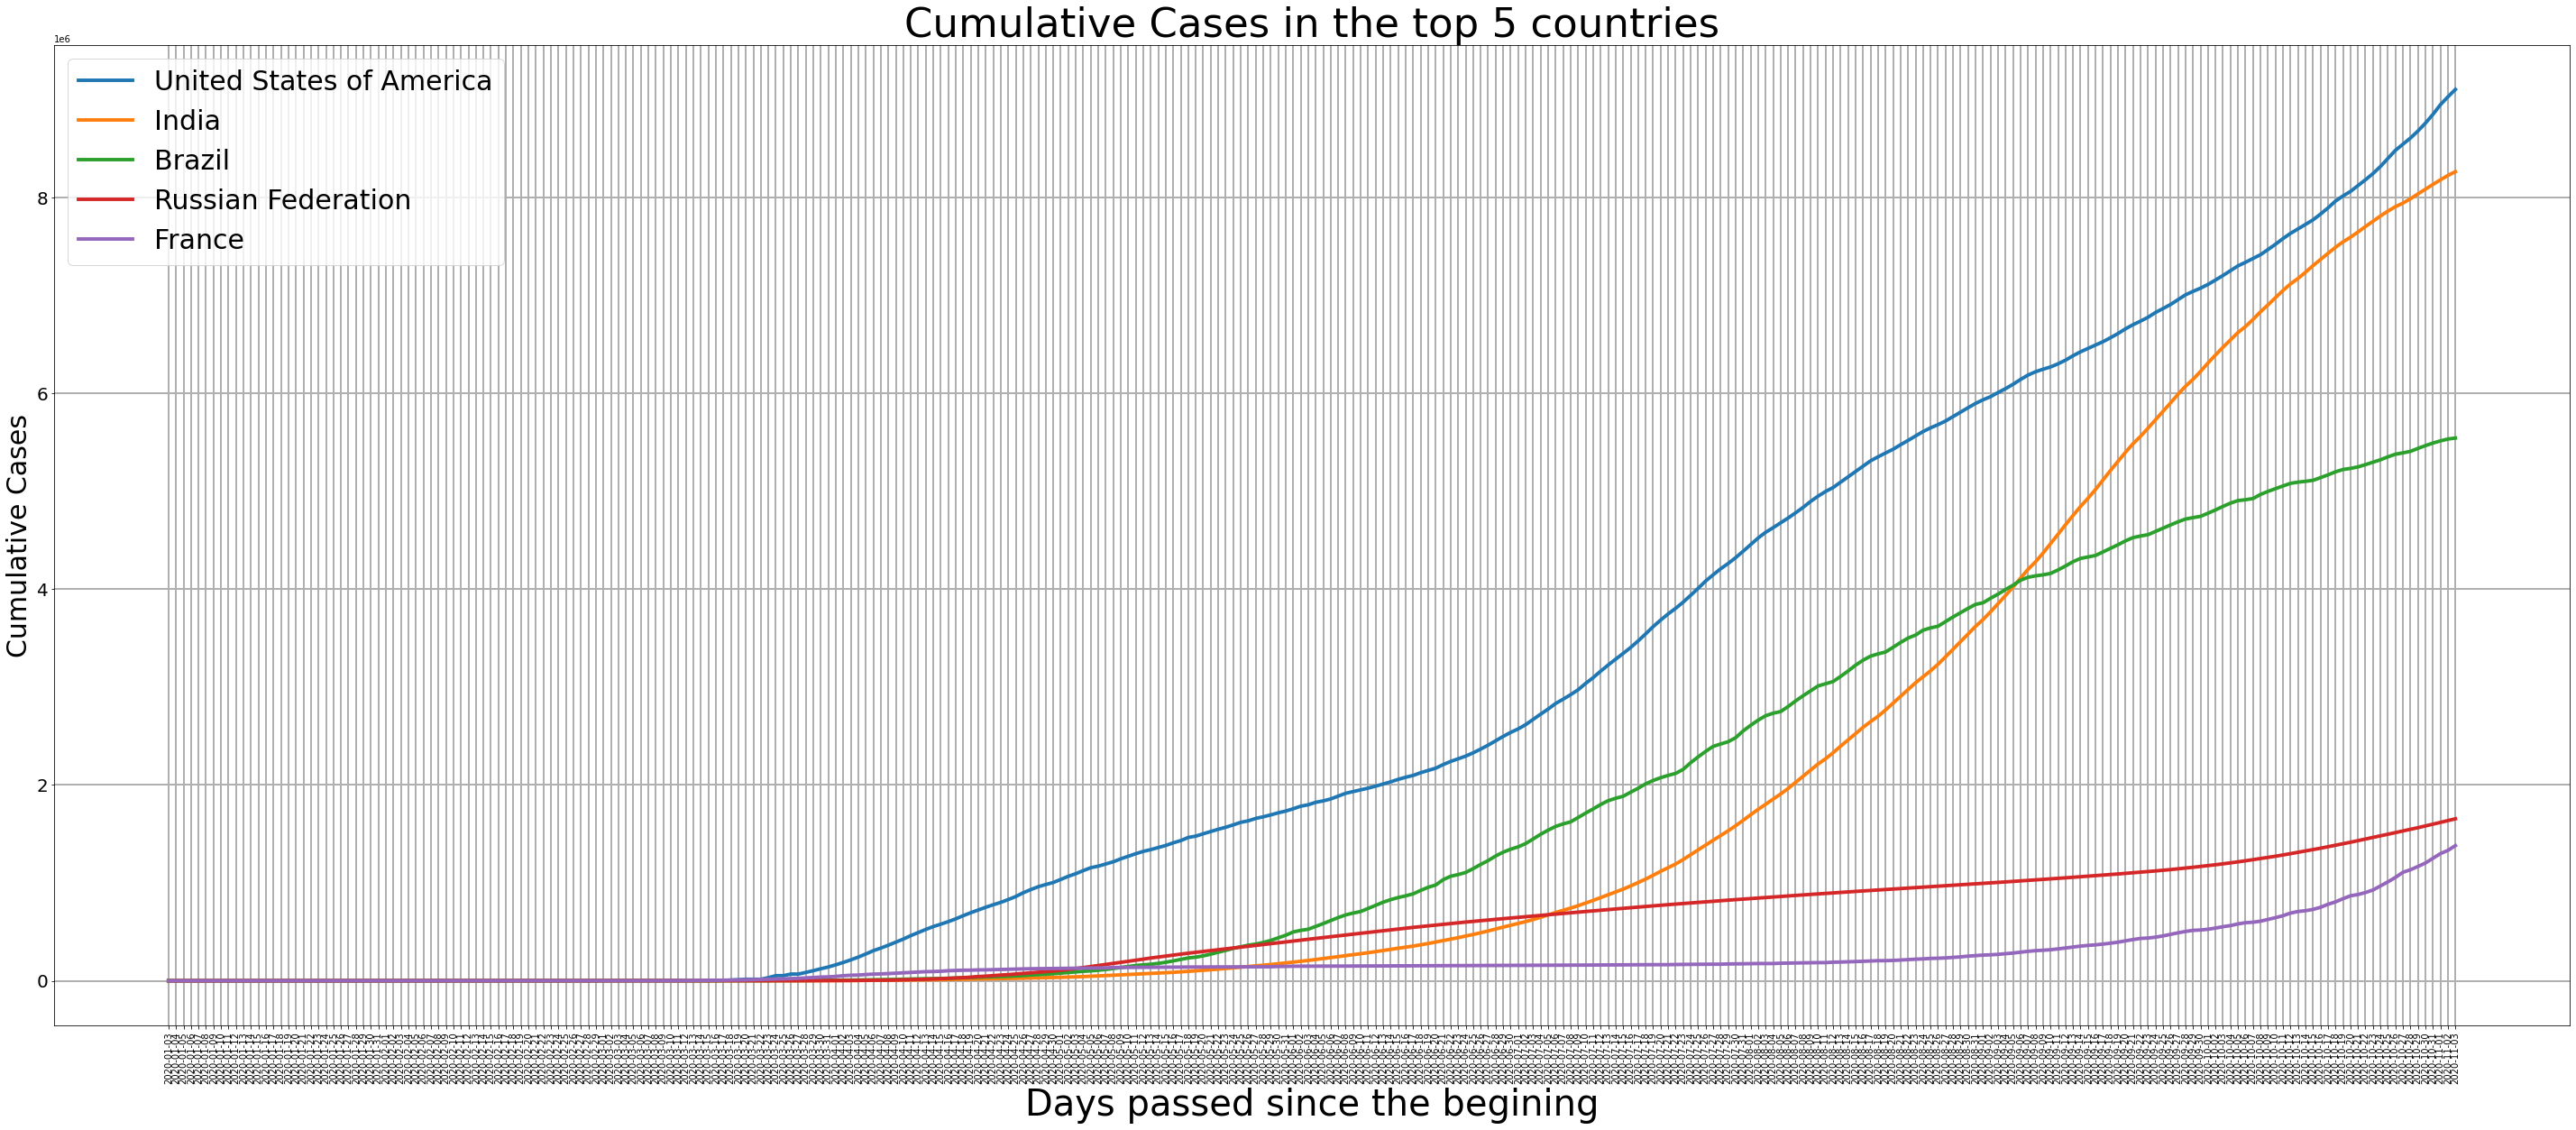

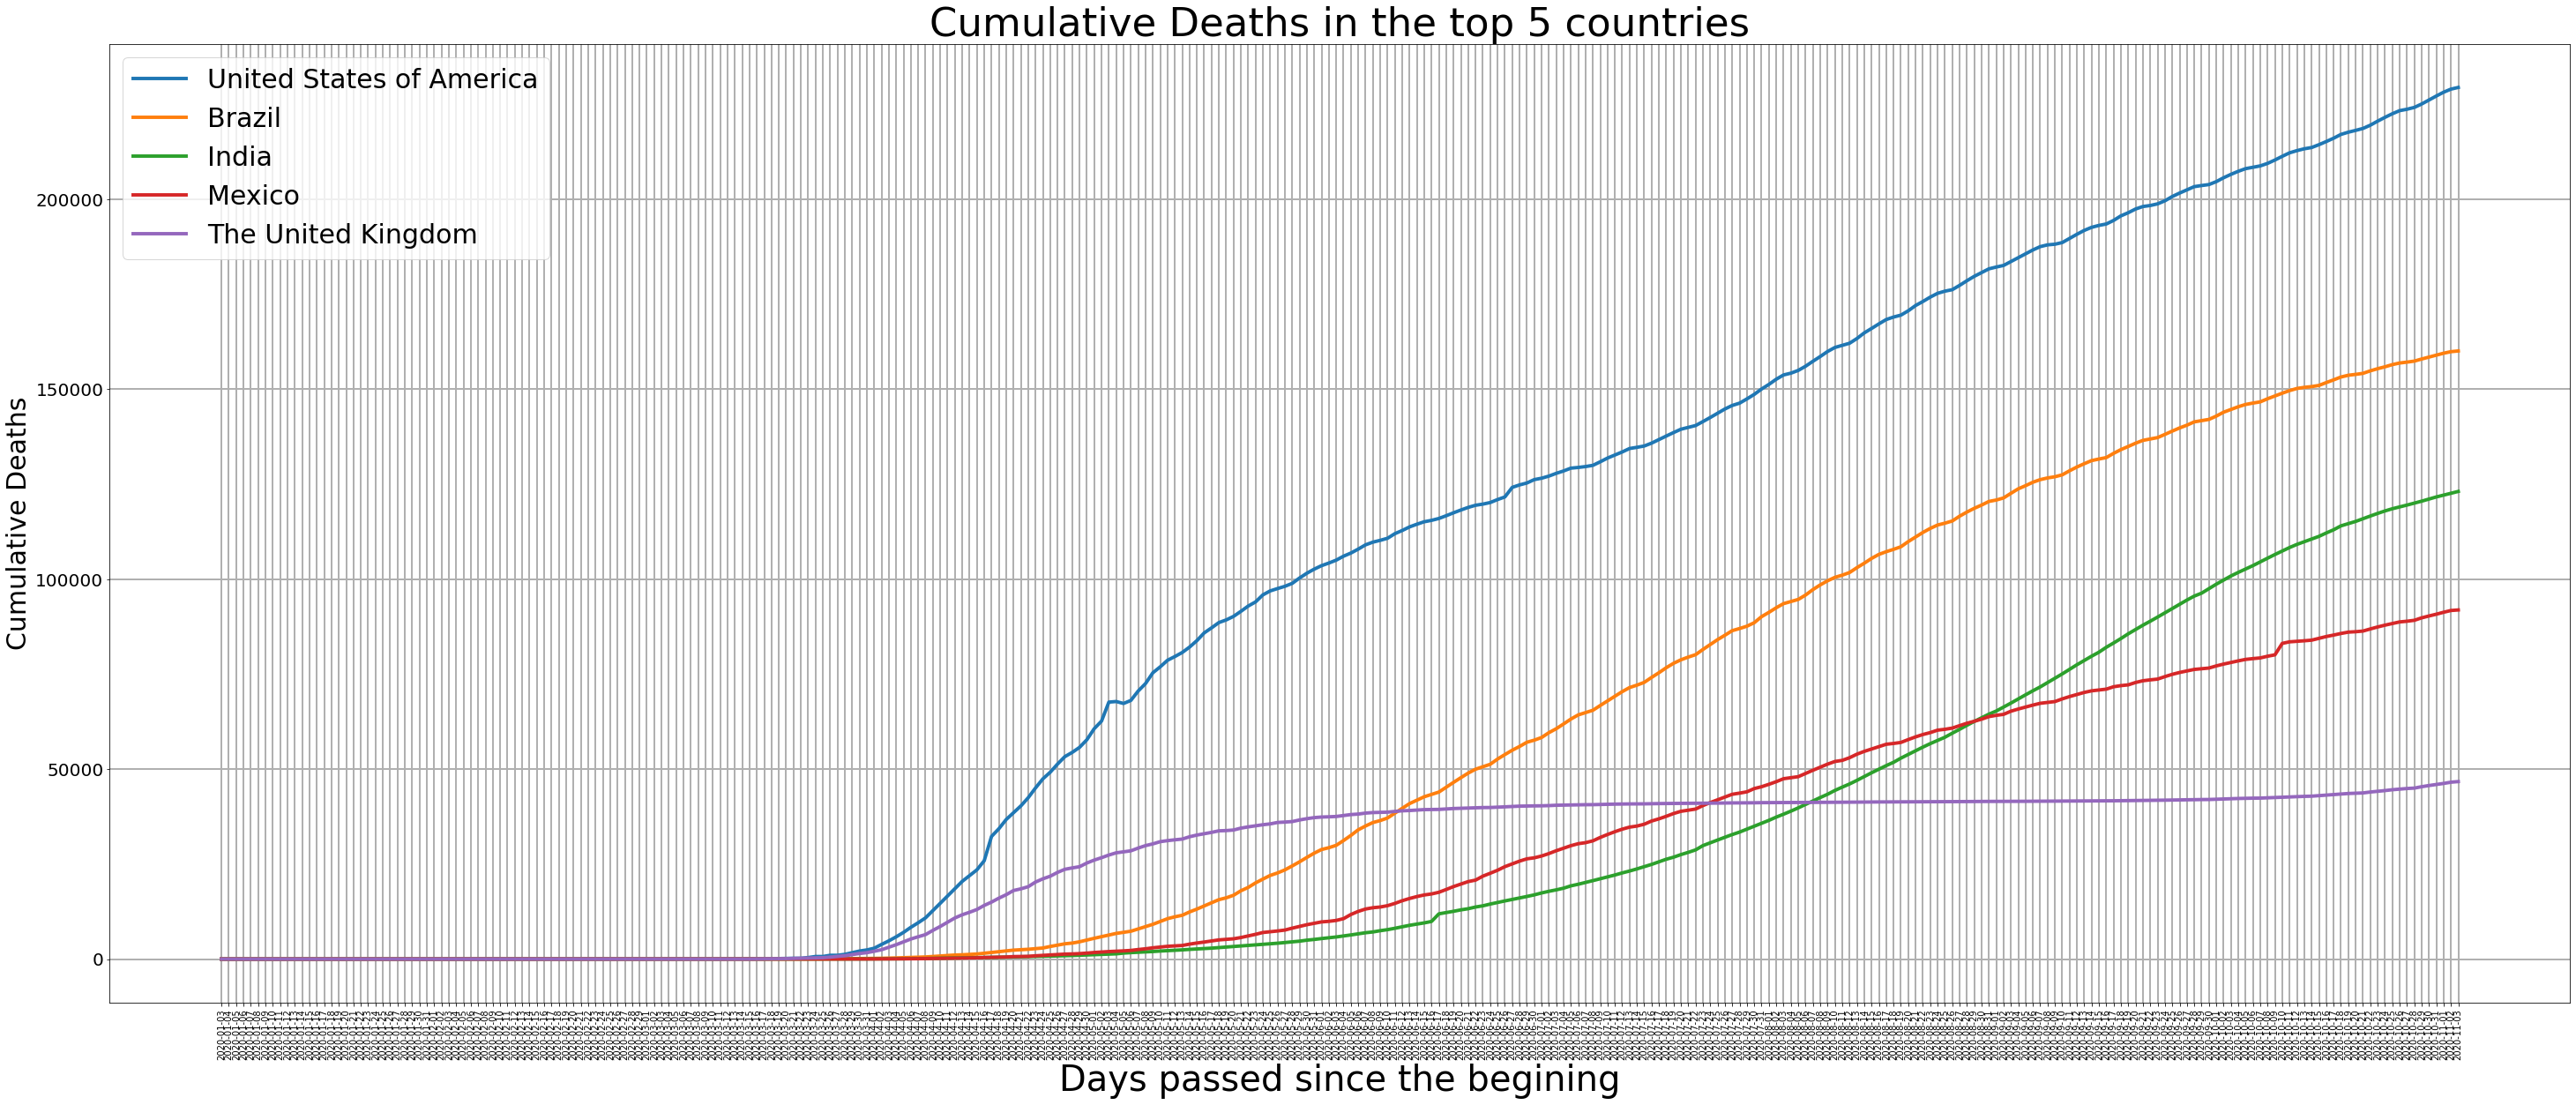

In [ ]:
plot_top5(Cumulative_cases,Overall_per_country,-1,1,"Cases")
plot_top5(Cumulative_deaths,Overall_per_country,-1,2,"Deaths")

In [ ]:
plt.figure(figsize=(64,64))
plt.rc('ytick',labelsize=16)
plt.title("Numbrer of confirmed cases per country around the globe", size=50)
plt.xlabel("Number of confirmed cases",size=40)
step = (1/2)*10**6
plt.xticks(np.arange(0, 10**7, step), size=32)
plt.grid(True)
for i in range(len(Cumulative_cases)):
  plt.barh(countries[i],Cumulative_cases[i][-1])
plt.show()


###Prediction for every country

In [ ]:
for j in range(len(New_cases)):
  Sumlast10 = 0
  for i in range(len(New_cases[j]),len(New_cases[j])-8,-1):
    if ((len(New_cases[j])-i)<2):
      Sumlast10 = Sumlast10 + 2.5*New_cases[j][i-1]
    elif ((len(New_cases[j])-i)<4):
      Sumlast10 = Sumlast10 + 2*New_cases[j][i-1]
    elif ((len(New_cases[j])-i)<6):
      Sumlast10 = Sumlast10 + 0.5*New_cases[j][i-1]
    else:
      Sumlast10 = Sumlast10 + 0.4*New_cases[j][i-1]
  NextDayCases = Sumlast10/8
  print(countries[j], "will have around", round(NextDayCases), "cases in the 3th of November")


Afghanistan will have around 129 cases in the 3th of November
Albania will have around 393 cases in the 3th of November
Algeria will have around 414 cases in the 3th of November
American Samoa will have around 0 cases in the 3th of November
Andorra will have around 113 cases in the 3th of November
Angola will have around 328 cases in the 3th of November
Anguilla will have around 0 cases in the 3th of November
Antigua and Barbuda will have around 1 cases in the 3th of November
Argentina will have around 14585 cases in the 3th of November
Armenia will have around 2748 cases in the 3th of November
Aruba will have around 23 cases in the 3th of November
Australia will have around 12 cases in the 3th of November
Austria will have around 6100 cases in the 3th of November
Azerbaijan will have around 1395 cases in the 3th of November
Bahamas will have around 56 cases in the 3th of November
Bahrain will have around 239 cases in the 3th of November
Bangladesh will have around 2100 cases in the 3t

In [ ]:
Passed_days_list = []
for i in range(len(Dates_reported)):
  Passed_days_list.append(i)
days_in_future = 10
future_forcast = np.array([i for i in range(len(Passed_days_list)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

start = '2020-01-03'
start_date = datetime.datetime.strptime(start, '%Y-%m-%d')
future_dates_reported = []
for i in range(len(future_forcast)):
    future_dates_reported.append((start_date + datetime.timedelta(days=i)).strftime('%Y-%m-%d'))

In [ ]:
#Ston X_train, X_test pane oi meres kai ston y_train, y_test ta sunolika krousmata
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(Passed_days_list, World_cases, test_size=0.15, shuffle=False) 
World_cases = np.array(World_cases).reshape(-1, 1)
Passed_days_list = np.array(Passed_days_list).reshape(-1, 1)
X_train_confirmed = np.array(X_train_confirmed).reshape(-1, 1)
X_test_confirmed = np.array(X_test_confirmed).reshape(-1, 1)
y_train_confirmed = np.array(y_train_confirmed).reshape(-1, 1)
y_test_confirmed = np.array(y_test_confirmed).reshape(-1, 1)


In [ ]:
def plot_predictions(Real_cases,Predict_cases,Present_days,Future_days,color,string):
    plt.figure(figsize=(16,10))
    plt.plot(Present_days,Real_cases,color='blue')
    plt.plot(Future_days, Predict_cases, linestyle='dashed',color=color)
    plt.title("Numbrer of confirmed cases VS {}".format(string),size=25)
    plt.ylabel("Number of confirmed cases",size=15)
    plt.xlabel("Days passed since begging",size=15)
    plt.legend(['Confirmed Cases', string], fontsize=15)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.grid(True)
    plt.show()

def test_predictor(predictor1,predictor2,string,flag):
  if (flag):
    predictor1.fit(X_train_confirmed,y_train_confirmed)
    test_pred = predictor1.predict(X_test_confirmed)
  else:
    X_new_test = predictor1.fit_transform(X_test_confirmed)
    test_pred = predictor2.predict(X_new_test)
  plt.plot(y_test_confirmed)
  plt.plot(test_pred)
  plt.grid(True)
  plt.legend(['Real Cases',string])

def Show_prediction_by_day(string,mypred):
  print(string,"for the next {} days (Total cases):".format(days_in_future))
  my_set = set (zip( future_dates_reported[-10:], np.round(mypred[-10:])))
  my_set = sorted(my_set)
  for x in my_set: 
    print(x[0]+":",x[1])
  print("For the next {} days the New cases will be according to {}:".format(days_in_future,string))
  for i in range(10,0,-1):
    cases_today = mypred[-i] - mypred[-(i+1)]
    print(future_dates_reported[-i] +":",  np.round(cases_today))

###SVM Prediction

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


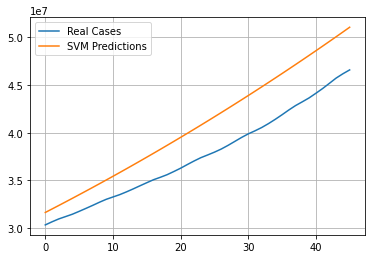

In [ ]:
SVΜ_cases = SVR(shrinking=True, kernel="poly", gamma=0.2, epsilon=0.5, degree=3, C=0.03, coef0=1.5)
World_cases.shape = (len(World_cases),)
SVΜ_cases.fit(Passed_days_list,World_cases)
predict_SVΜ = SVΜ_cases.predict(future_forcast) 
test_predictor(SVΜ_cases,None,'SVM Predictions', True)

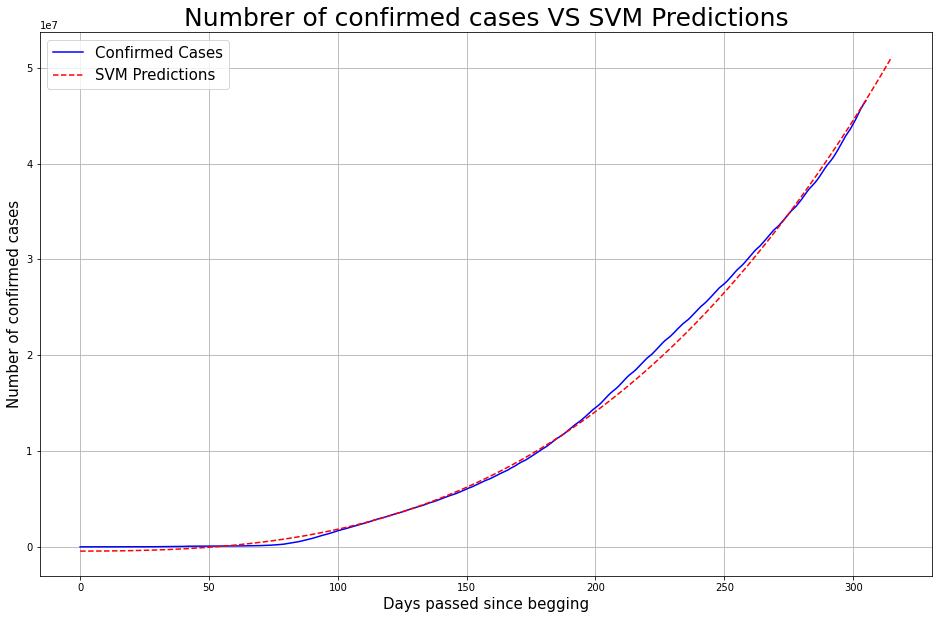

In [ ]:
plot_predictions(World_cases, predict_SVΜ, adjusted_dates, future_forcast, 'red','SVM Predictions')

In [ ]:
Show_prediction_by_day('SVM predictions',predict_SVΜ)  

SVM predictions for the next 10 days (Total cases):
2020-11-04: 47097618.0
2020-11-05: 47536565.0
2020-11-06: 47978193.0
2020-11-07: 48422512.0
2020-11-08: 48869528.0
2020-11-09: 49319251.0
2020-11-10: 49771687.0
2020-11-11: 50226846.0
2020-11-12: 50684736.0
2020-11-13: 51145364.0
For the next 10 days the New cases will be according to SVM predictions:
2020-11-04: 436273.0
2020-11-05: 438947.0
2020-11-06: 441629.0
2020-11-07: 444318.0
2020-11-08: 447016.0
2020-11-09: 449722.0
2020-11-10: 452437.0
2020-11-11: 455159.0
2020-11-12: 457889.0
2020-11-13: 460628.0


###Linear Regression Prediction

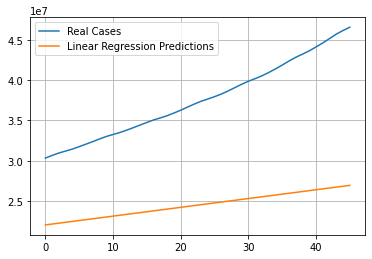

In [ ]:
linearR_cases = LinearRegression(fit_intercept=True, normalize=True)
linearR_cases.fit(Passed_days_list,World_cases)
predict_linearR = linearR_cases.predict(future_forcast) 
test_predictor(linearR_cases,None,'Linear Regression Predictions',True)

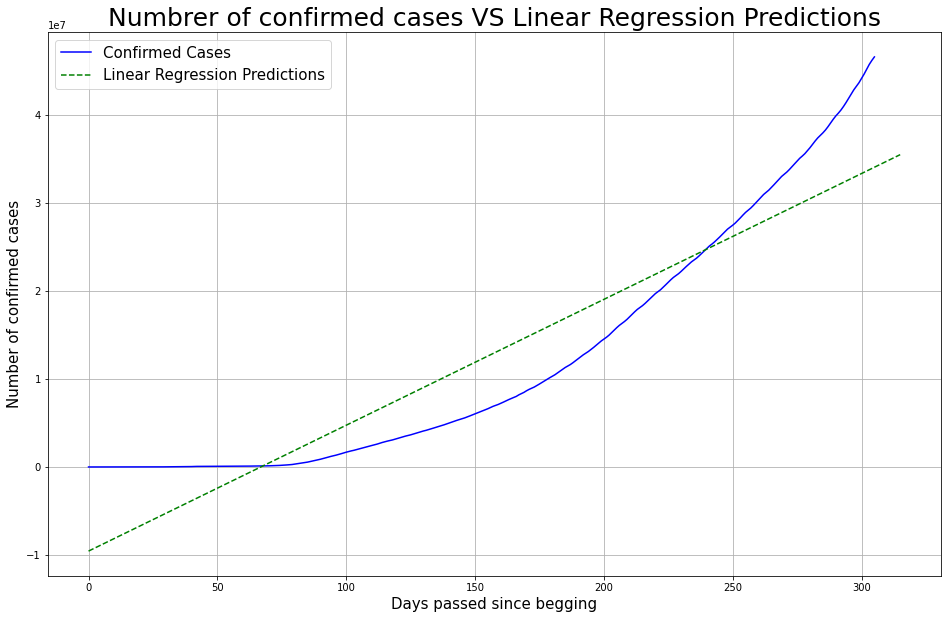

In [ ]:
plot_predictions(World_cases, predict_linearR, adjusted_dates, future_forcast, 'green','Linear Regression Predictions')

In [ ]:
Show_prediction_by_day('Linear Regression predictions',predict_linearR)  

Linear Regression predictions for the next 10 days (Total cases):
2020-11-04: 34197832.0
2020-11-05: 34340827.0
2020-11-06: 34483822.0
2020-11-07: 34626816.0
2020-11-08: 34769811.0
2020-11-09: 34912806.0
2020-11-10: 35055801.0
2020-11-11: 35198796.0
2020-11-12: 35341791.0
2020-11-13: 35484785.0
For the next 10 days the New cases will be according to Linear Regression predictions:
2020-11-04: 142995.0
2020-11-05: 142995.0
2020-11-06: 142995.0
2020-11-07: 142995.0
2020-11-08: 142995.0
2020-11-09: 142995.0
2020-11-10: 142995.0
2020-11-11: 142995.0
2020-11-12: 142995.0
2020-11-13: 142995.0


###Polynomial Regression Interpolation

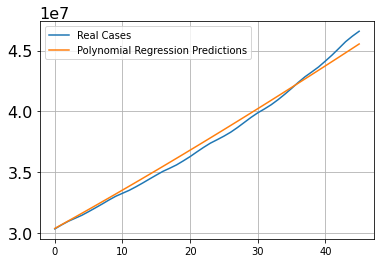

In [ ]:
poly_reg = PolynomialFeatures(degree=4)
X_poly_present = poly_reg.fit_transform(Passed_days_list)
X_poly_future = poly_reg.fit_transform(future_forcast)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_present, World_cases)
predict_polynomialR = lin_reg.predict(X_poly_future)
test_predictor(poly_reg,lin_reg,'Polynomial Regression Predictions',False)

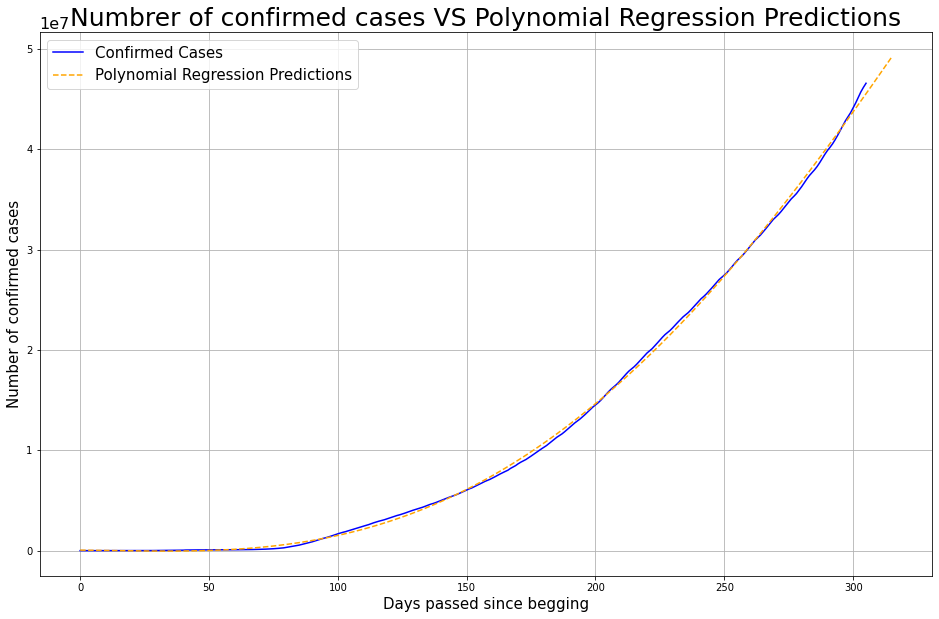

In [ ]:
plot_predictions(World_cases, predict_polynomialR, adjusted_dates, future_forcast, 'orange','Polynomial Regression Predictions')

In [ ]:
Show_prediction_by_day('Polynomial Regression predictions',predict_polynomialR)  

Polynomial Regression predictions for the next 10 days (Total cases):
2020-11-04: 45907346.0
2020-11-05: 46271534.0
2020-11-06: 46636662.0
2020-11-07: 47002717.0
2020-11-08: 47369685.0
2020-11-09: 47737555.0
2020-11-10: 48106311.0
2020-11-11: 48475942.0
2020-11-12: 48846433.0
2020-11-13: 49217772.0
For the next 10 days the New cases will be according to Polynomial Regression predictions:
2020-11-04: 363236.0
2020-11-05: 364189.0
2020-11-06: 365128.0
2020-11-07: 366055.0
2020-11-08: 366968.0
2020-11-09: 367869.0
2020-11-10: 368757.0
2020-11-11: 369631.0
2020-11-12: 370491.0
2020-11-13: 371339.0


###Bayesian Ridge Interpolation


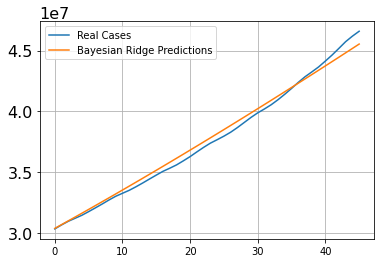

In [ ]:
bayesian_poly = PolynomialFeatures(degree=4)
X_new_present = bayesian_poly.fit_transform(Passed_days_list)
X_new_future = bayesian_poly.fit_transform(future_forcast)
bayesian = BayesianRidge(n_iter=600,compute_score=True,fit_intercept=False)
bayesian.fit(X_new_present,World_cases)
predict_bayesian = bayesian.predict(X_new_future)
test_predictor(bayesian_poly,bayesian,'Bayesian Ridge Predictions',False)

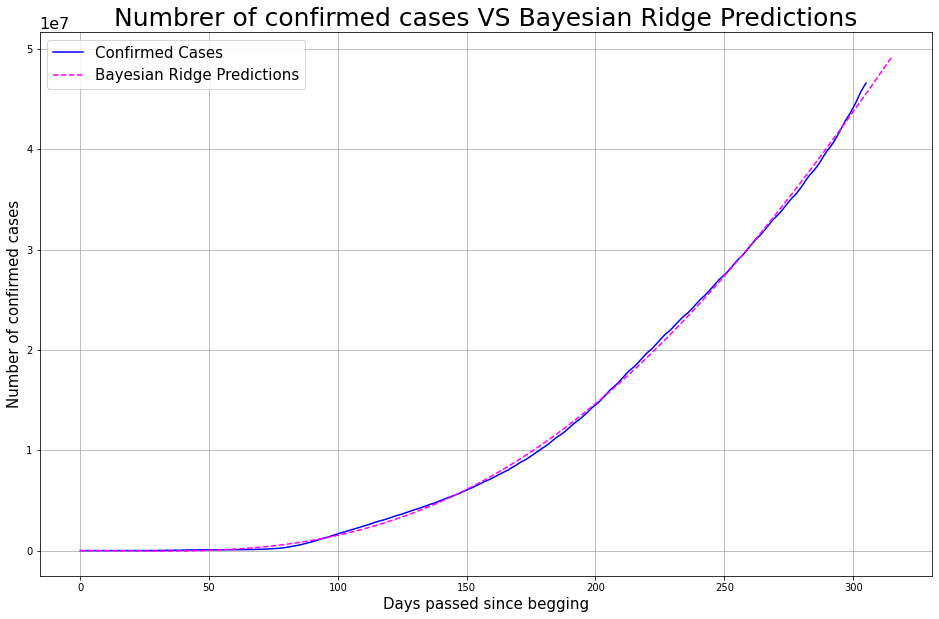

In [ ]:
plot_predictions(World_cases, predict_bayesian, adjusted_dates, future_forcast, 'magenta','Bayesian Ridge Predictions')

In [ ]:
Show_prediction_by_day('Bayesian Ridge predictions',predict_bayesian)  

Bayesian Ridge predictions for the next 10 days (Total cases):
2020-11-04: 45899718.0
2020-11-05: 46263216.0
2020-11-06: 46627628.0
2020-11-07: 46992939.0
2020-11-08: 47359137.0
2020-11-09: 47726209.0
2020-11-10: 48094140.0
2020-11-11: 48462916.0
2020-11-12: 48832525.0
2020-11-13: 49202951.0
For the next 10 days the New cases will be according to Bayesian Ridge predictions:
2020-11-04: 362571.0
2020-11-05: 363498.0
2020-11-06: 364411.0
2020-11-07: 365312.0
2020-11-08: 366198.0
2020-11-09: 367071.0
2020-11-10: 367931.0
2020-11-11: 368777.0
2020-11-12: 369608.0
2020-11-13: 370426.0


###Predictionns of SVM for Greece


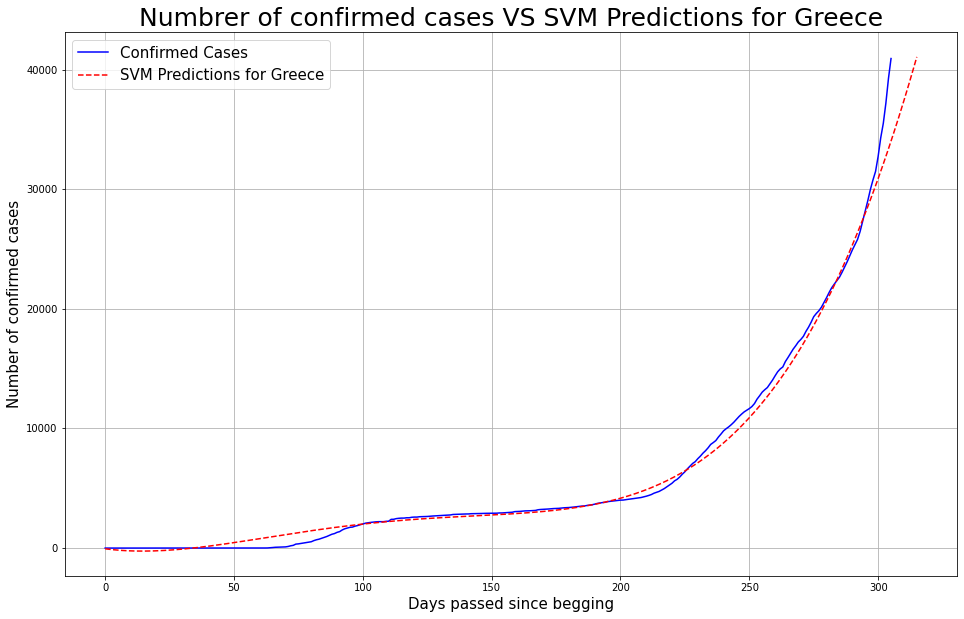

In [ ]:
Greece_cases = Cumulative_cases[81]
Greece_cases = np.array(Greece_cases).reshape(-1, 1)
SVΜ_cases = SVR(shrinking=True, kernel="poly", gamma=0.01, epsilon=0.5, degree=4, C=0.05, coef0=3.0)
Greece_cases.shape = (len(Greece_cases),)
SVΜ_cases.fit(Passed_days_list,Greece_cases)
predict_SVΜ_Gr = SVΜ_cases.predict(future_forcast) 
plot_predictions(Greece_cases, predict_SVΜ_Gr, adjusted_dates, future_forcast, 'red','SVM Predictions for Greece')

In [ ]:
Show_prediction_by_day('SVM predictions for Greece',predict_SVΜ_Gr)  

SVM predictions for Greece for the next 10 days (Total cases):
2020-11-04: 34681.0
2020-11-05: 35347.0
2020-11-06: 36025.0
2020-11-07: 36712.0
2020-11-08: 37410.0
2020-11-09: 38119.0
2020-11-10: 38839.0
2020-11-11: 39570.0
2020-11-12: 40312.0
2020-11-13: 41065.0
For the next 10 days the New cases will be according to SVM predictions for Greece:
2020-11-04: 656.0
2020-11-05: 667.0
2020-11-06: 677.0
2020-11-07: 688.0
2020-11-08: 698.0
2020-11-09: 709.0
2020-11-10: 720.0
2020-11-11: 731.0
2020-11-12: 742.0
2020-11-13: 753.0


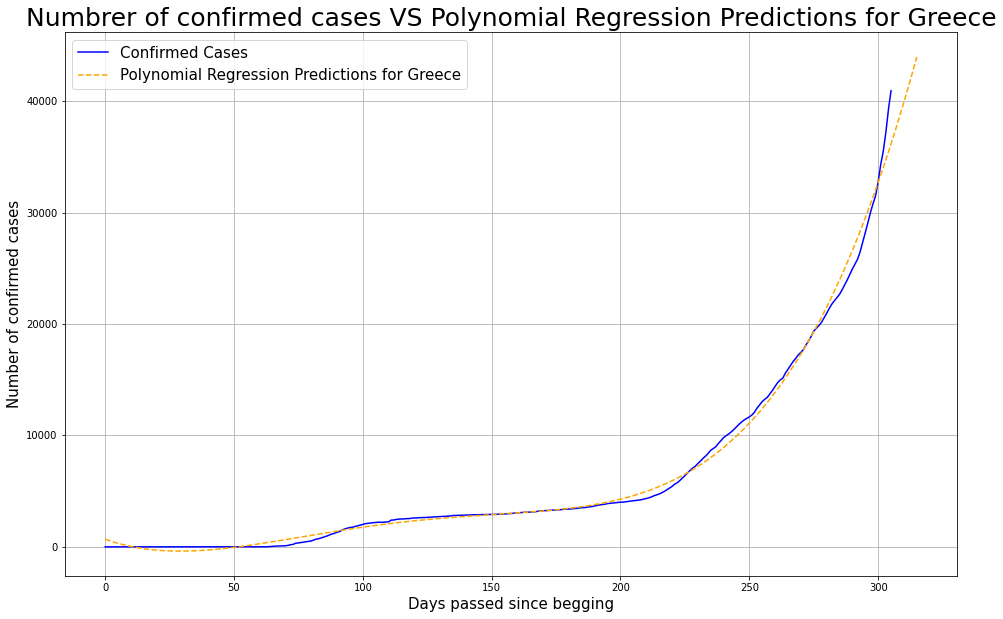

In [ ]:
poly_reg = PolynomialFeatures(degree=10,interaction_only=True)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_present, Greece_cases)
predict_polynomialR_gr = lin_reg.predict(X_poly_future)
plot_predictions(Greece_cases, predict_polynomialR_gr, adjusted_dates, future_forcast, 'orange','Polynomial Regression Predictions for Greece')

In [ ]:
Show_prediction_by_day('Polynomial Regression predictions for Greece',predict_polynomialR_gr)

Polynomial Regression predictions for Greece for the next 10 days (Total cases):
2020-11-04: 36872.0
2020-11-05: 37610.0
2020-11-06: 38361.0
2020-11-07: 39123.0
2020-11-08: 39898.0
2020-11-09: 40685.0
2020-11-10: 41485.0
2020-11-11: 42297.0
2020-11-12: 43123.0
2020-11-13: 43961.0
For the next 10 days the New cases will be according to Polynomial Regression predictions for Greece:
2020-11-04: 726.0
2020-11-05: 738.0
2020-11-06: 750.0
2020-11-07: 762.0
2020-11-08: 775.0
2020-11-09: 787.0
2020-11-10: 800.0
2020-11-11: 813.0
2020-11-12: 825.0
2020-11-13: 838.0


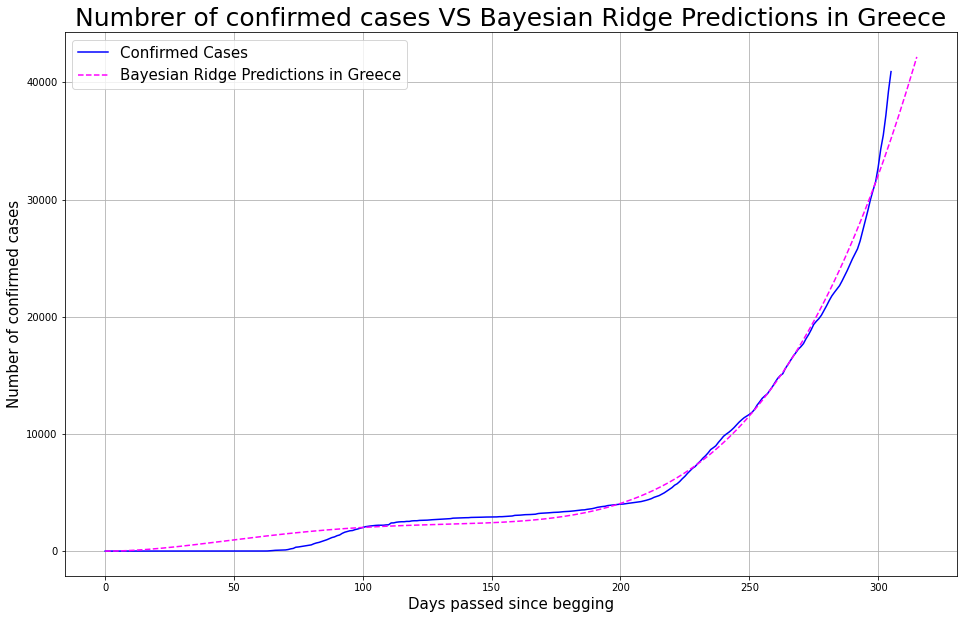

In [ ]:
bayesian_poly = PolynomialFeatures(degree=5)
bayesian = BayesianRidge(n_iter=1000,compute_score=True,fit_intercept=False,tol=0.0001)
bayesian.fit(X_new_present,Greece_cases)
predict_bayesian_gr = bayesian.predict(X_new_future)
plot_predictions(Greece_cases, predict_bayesian_gr, adjusted_dates, future_forcast, 'magenta','Bayesian Ridge Predictions in Greece')

In [ ]:
Show_prediction_by_day(' Bayesian Interpolation predictions for Greece',predict_bayesian_gr)  

 Bayesian Interpolation predictions for Greece for the next 10 days (Total cases):
2020-11-04: 35849.0
2020-11-05: 36513.0
2020-11-06: 37186.0
2020-11-07: 37870.0
2020-11-08: 38563.0
2020-11-09: 39267.0
2020-11-10: 39981.0
2020-11-11: 40704.0
2020-11-12: 41439.0
2020-11-13: 42183.0
For the next 10 days the New cases will be according to  Bayesian Interpolation predictions for Greece:
2020-11-04: 654.0
2020-11-05: 664.0
2020-11-06: 674.0
2020-11-07: 684.0
2020-11-08: 693.0
2020-11-09: 704.0
2020-11-10: 714.0
2020-11-11: 724.0
2020-11-12: 734.0
2020-11-13: 745.0


###Prediction using the Prophet model


In [ ]:
World_cases = np.array(World_cases)
World_cases.shape = (len(World_cases),1)
print(World_cases.shape)
Dates_reported = np.array(Dates_reported)
Dates_reported.shape = (len(Dates_reported),1)
print(Dates_reported.shape)
World_cases_perday = np.concatenate((Dates_reported,World_cases), axis=1)
print((World_cases_perday.shape))
World_cases_perday = pd.DataFrame(data=World_cases_perday)
World_cases_perday.columns = ['ds', 'y']
print(World_cases_perday)

(306, 1)
(306, 1)
(306, 2)
             ds         y
0    2020-01-03         0
1    2020-01-04         1
2    2020-01-05         1
3    2020-01-06         4
4    2020-01-07         4
..          ...       ...
301  2020-10-30  44635676
302  2020-10-31  45180637
303  2020-11-01  45734069
304  2020-11-02  46186376
305  2020-11-03  46591622

[306 rows x 2 columns]


In [ ]:
ph = Prophet(n_changepoints=31, changepoint_prior_scale=0.999 ,interval_width=0.999,daily_seasonality=True, seasonality_mode='additive',seasonality_prior_scale=10)
ph.fit(World_cases_perday)
World_cases_perday.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


ds         y
301  2020-10-30  44635676
302  2020-10-31  45180637
303  2020-11-01  45734069
304  2020-11-02  46186376
305  2020-11-03  46591622

In [ ]:
future_prediction = ph.make_future_dataframe(periods=10)
future_prediction.tail()

ds
311 2020-11-09
312 2020-11-10
313 2020-11-11
314 2020-11-12
315 2020-11-13

In [ ]:
forecast = ph.predict(future_prediction)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds          yhat    yhat_lower    yhat_upper
306 2020-11-04  4.535842e+07  4.457580e+07  4.621151e+07
307 2020-11-05  4.568718e+07  4.475231e+07  4.654875e+07
308 2020-11-06  4.602688e+07  4.523592e+07  4.700057e+07
309 2020-11-07  4.637187e+07  4.556942e+07  4.728384e+07
310 2020-11-08  4.671747e+07  4.570602e+07  4.756687e+07
311 2020-11-09  4.705154e+07  4.622533e+07  4.786855e+07
312 2020-11-10  4.736079e+07  4.653445e+07  4.827055e+07
313 2020-11-11  4.763472e+07  4.678215e+07  4.855187e+07
314 2020-11-12  4.796349e+07  4.707464e+07  4.872251e+07
315 2020-11-13  4.830319e+07  4.748929e+07  4.927552e+07

In [ ]:
y = np.array(forecast['yhat'])[-10:]
y_l = np.array(forecast['yhat_lower'])[-10:]
y_u = np.array(forecast['yhat_upper'])[-10:]
for i in range(len(y)):
  y[i] = int (y[i])
  y_l[i] = int (y_l[i])
  y_u[i] = int (y_u[i])
print(y)
print(y_l)
print(y_u)

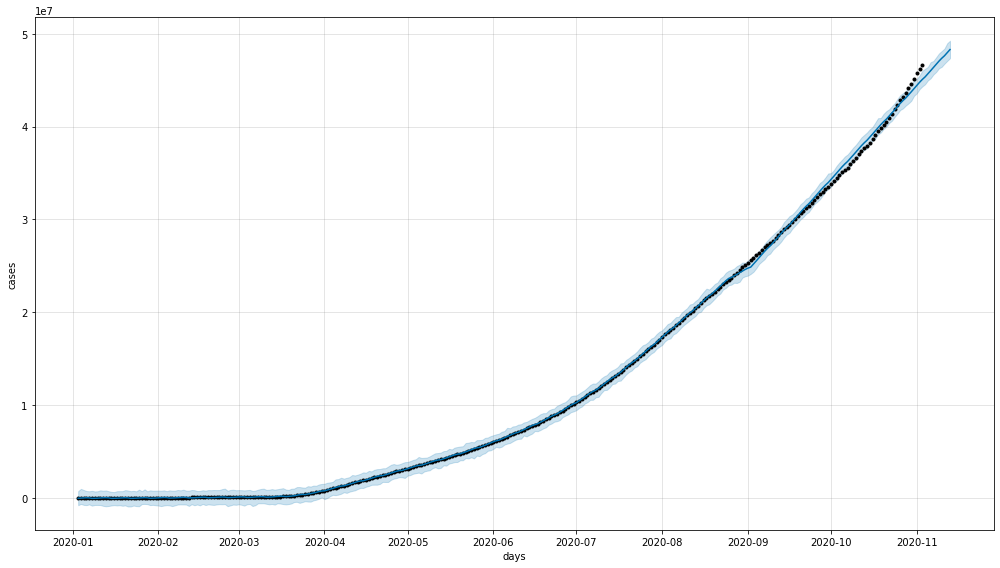

In [ ]:
future_plot = ph.plot(forecast, figsize=(14,8), xlabel='days', ylabel='cases')

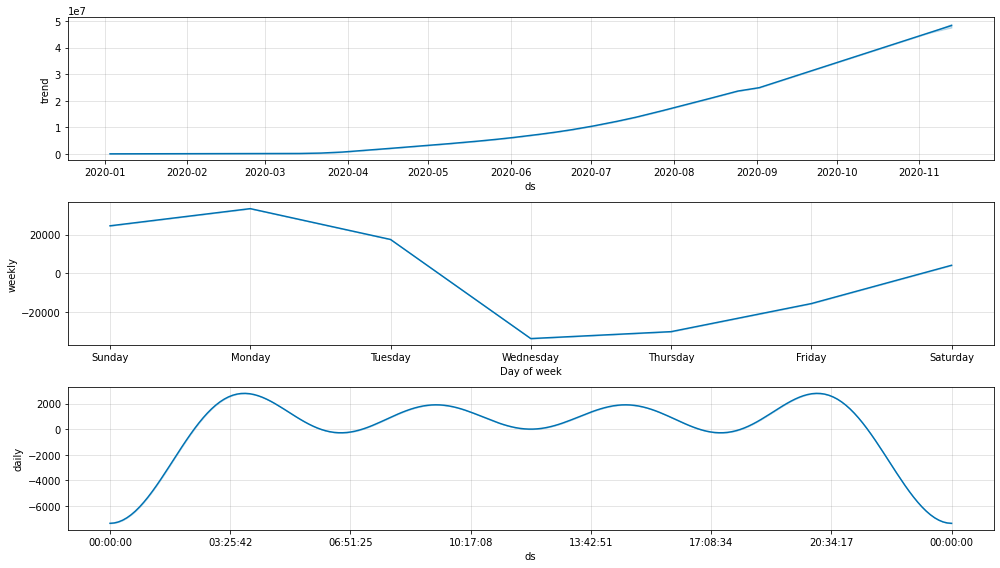

In [ ]:
trends_weekly_dayly_plot = ph.plot_components(forecast, figsize=(14,8))

###Map Visualization

In [ ]:
import collections

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
countries_geo = f'{url}/world-countries.json'
print(countries_geo)
with urllib.request.urlopen(countries_geo) as f:
    html = f.read().decode('utf-8')

my_dictionary = json.loads(html)

#for i in my_dictionary['features']:
#  print(type(i['properties']['name']))
#  break
#print(type(my_dictionary['features'][0]))
#my_dict = collections.OrderedDict(sorted(my_dictionary.items(),key=lambda t: t[0][3][0]))
#print(my_dict['features'][3])
denominations_json = []
for index in range(len(my_dictionary['features'])):
    denominations_json.append(my_dictionary['features'][index]['properties']['name'])
    
denominations_json = sorted(denominations_json)
#print((denominations_json))

Overall = pd.DataFrame(data=Overall_per_country)
#columns_titles = [0,1]
#Overall=Overall.reindex(columns=columns_titles)
dataframe_names = Overall[0].tolist()
print(len(dataframe_names))
Overall.replace(dict (zip(dataframe_names, denominations_json)), inplace=True)

def make_right(index,id):
  for k in range(1,6):
    Overall[k][index] = Overall_per_country[id][k]

for i in range(len(Overall)):
  for j in Overall_per_country:
    x = similar(Overall[0][i],j[0])
    if (x>=0.99):
      Overall[1][i] = j[1]
      Overall[2][i] = j[2]
      Overall[3][i] = j[3]
      Overall[4][i] = j[4]
      Overall[5][i] = j[5]
  if (Overall[0][i]=="Russia"):
    make_right(i,175)
  if (Overall[0][i]== "Iran"):
    make_right(i,98)

#print(Overall)
for i in range(len(Overall)):
  print(Overall[0][i], Overall[1][i], "           ", Overall_per_country[i][0], Overall_per_country[i][1])
  

https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json
235


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is tryi

Afghanistan 41633.0             Afghanistan 41633.0
Albania 21202.0             Albania 21202.0
Algeria 57942.0             Algeria 57942.0
Angola 11035.0             American Samoa 0.0
Antarctica 4825.0             Andorra 4825.0
Argentina 1173533.0             Angola 11035.0
Armenia 93448.0             Anguilla 3.0
Australia 27602.0             Antigua and Barbuda 128.0
Austria 111110.0             Argentina 1173533.0
Azerbaijan 56444.0             Armenia 93448.0
Bangladesh 410988.0             Aruba 4519.0
Belarus 99459.0             Australia 27602.0
Belgium 440923.0             Austria 111110.0
Belize 3577.0             Azerbaijan 56444.0
Benin 2683.0             Bahamas 6759.0
Bhutan 356.0             Bahrain 81923.0
Bolivia 410988.0             Bangladesh 410988.0
Bosnia and Herzegovina 51505.0             Barbados 237.0
Botswana 6642.0             Belarus 99459.0
Brazil 5545705.0             Belgium 440923.0
Brunei 3577.0             Belize 3577.0
Bulgaria 54069.0             

In [ ]:
bins = list (Overall[1].quantile([0, 0.8, 0.93, 0.96, 0.98, 0.987, 0.991,1]))
Legends = ['Cases','Deaths','Mortality', 'Cases per milion', 'Deaths per milion']
m = folium.Map(location=[10,-10],width='80%',height='80%',top='0%',left='0%',position='relative',tiles='OpenStreetMap',max_zoom=20, min_zoom=0,zoom_start=2)
folium.Choropleth(
    geo_data=countries_geo,
    name='choropleth',
    data=Overall,
    columns=[0, 1],
    key_on='properties.name',
    fill_color='OrRd',
    fill_opacity=0.9,
    line_opacity=0.6,
    legend_name=Legends[0],
    bins=bins,
    smooth_factor = 1,
    reset=True
).add_to(m)
folium.LayerControl().add_to(m)
m


In [ ]:
bins = list (Overall[2].quantile([0, 0.8, 0.91, 0.93, 0.96, 0.98, 0.991,1]))
Legends = ['Cases','Deaths','Mortality', 'Cases per milion', 'Deaths per milion']
m = folium.Map(location=[10,-10],width='80%',height='80%',top='0%',left='0%',position='relative',tiles='OpenStreetMap',max_zoom=20, min_zoom=0,zoom_start=2)
folium.Choropleth(
    geo_data=countries_geo,
    name='choropleth',
    data=Overall,
    columns=[0, 2],
    key_on='properties.name',
    fill_color='BuPu',
    fill_opacity=0.9,
    line_opacity=0.6,
    legend_name=Legends[1],
    bins=bins,
    smooth_factor = 1,
    reset=True
).add_to(m)
folium.LayerControl().add_to(m)
m